# Entity Resolution project @ Wavestone
## Entity Matching

> *Datasets information from [here](https://data.dws.informatik.uni-mannheim.de/benchmarkmatchingtasks/index.html)*

> **Tristan PERROT**


## Run results

In [1]:
!python result_berts.py

Using device: cuda
/home/jovyan/.local/lib/python3.10/site-packages/transformers/utils/hub.py:128: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/opt/conda/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
2025-01-29 10:09:03.292331: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF

## Import libraries

In [1]:
import os

while 'model' not in os.listdir():
    os.chdir('..')

In [2]:
import re
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

from model.utils import load_data
import src.bert.result_berts as result_berts
import src.import_data as import_data

Using device: cpu


/Users/ttperr/Documents/Code/Pro/Work/WavER/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
print('Available models:')
print(result_berts.MODELS)
print()
print('Available datasets:')
print(result_berts.DATA_NAMES)

Available models:
['roberta-base', 'distilroberta-base', 'bert-base-uncased']

Available datasets:
['fodors-zagats', 'amazon-google', 'abt-buy']


In [4]:
preds = {}
results_dict = {}
for data_name in result_berts.DATA_NAMES:
    results_dict[data_name] = {}
    table_a_serialized, table_b_serialized, X_train_ids, y_train, X_valid_ids, y_valid, X_test_ids, y_test = load_data(os.path.join(import_data.DATA_FOLDER, data_name))
    for model_name in result_berts.MODELS:
        results_dict[data_name][model_name] = {}
        for order_cols in result_berts.LOAD_OPTIONS['order_cols']:
            results_dict[data_name][model_name][order_cols] = {}
            for remove_col_names in result_berts.LOAD_OPTIONS['remove_col_names']:
                dir_name = f'{data_name}-berts/{model_name}-order_cols_{order_cols}-remove_col_names_{remove_col_names}'
                logits = pd.read_csv(os.path.join('results', dir_name, 'logits.csv'), names=['idA', 'idB', 'pred'])
                with open(os.path.join('results', dir_name, 'train_time.txt'), 'r') as file:
                    train_time = float(file.read().strip())
                results_dict[data_name][model_name][order_cols][remove_col_names] = {}
                results_dict[data_name][model_name][order_cols][remove_col_names]['precision'] = precision_score(y_test, logits['pred'].values > result_berts.threshold)
                results_dict[data_name][model_name][order_cols][remove_col_names]['recall'] = recall_score(y_test, logits['pred'].values > result_berts.threshold)
                results_dict[data_name][model_name][order_cols][remove_col_names]['f1'] = f1_score(y_test, logits['pred'].values > result_berts.threshold)
                results_dict[data_name][model_name][order_cols][remove_col_names]['roc_auc'] = roc_auc_score(y_test, logits['pred'].values)
                results_dict[data_name][model_name][order_cols][remove_col_names]['accuracy'] = accuracy_score(y_test, logits['pred'].values > result_berts.threshold)
                results_dict[data_name][model_name][order_cols][remove_col_names]['confusion_matrix'] = confusion_matrix(y_test, logits['pred'].values > result_berts.threshold)
                fpr, tpr, _ = roc_curve(y_test, logits['pred'].values)
                results_dict[data_name][model_name][order_cols][remove_col_names]['roc_curve'] = (fpr, tpr, auc(fpr, tpr))
                results_dict[data_name][model_name][order_cols][remove_col_names]['logits'] = logits
                results_dict[data_name][model_name][order_cols][remove_col_names]['train_time'] = train_time

Table A columns:
  column_name              data_example
1        addr  '435 s. la cienega blv.'
2        city             'los angeles'
3       phone              310/246-1501
4        type                  american 

Table B columns:
  column_name           data_example
1        addr  '10801 w. pico blvd.'
2        city              'west la'
3       phone           310-475-3585
4        type               american 

Serialized entities 

Table A columns:
    column_name data_example
1   description          NaN
2  manufacturer   broderbund
3         price          0.0 

Table B columns:
    column_name              data_example
1   description  learning quickbooks 2007
2  manufacturer                    intuit
3         price                     38.99 



/Users/ttperr/Documents/Code/Pro/Work/WavER/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ttperr/Documents/Code/Pro/Work/WavER/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ttperr/Documents/Code/Pro/Work/WavER/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

Serialized entities 

Table A columns:
   column_name                                       data_example
1  description  Sony Turntable - PSLX350H/ Belt Drive System/ ...
2        price                                                NaN 

Table B columns:
    column_name                                       data_example
1   description  Linksys EtherFast 8-Port 10/100 Switch (New/Wo...
2  manufacturer                                            LINKSYS
3         price                                                NaN 

Columns are not the same in both tables
Table A columns: ['name' 'description' 'price']
Table B columns: ['name' 'description' 'manufacturer' 'price']
Serialized entities 



In [5]:
for data_name, models in results_dict.items():
    best_f1 = 0
    best_option = None
    for model_name, orders in models.items():
        for order_cols, removes in orders.items():
            for remove_col_names, metrics in removes.items():
                if metrics['f1'] > best_f1:
                    best_f1 = metrics['f1']
                    best_option = (model_name, order_cols, remove_col_names)
    print(f"Dataset: {data_name}, Best F1 Score: {best_f1}, Options: {best_option}")

Dataset: fodors-zagats, Best F1 Score: 1.0, Options: ('roberta-base', True, True)
Dataset: amazon-google, Best F1 Score: 0.8235294117647058, Options: ('roberta-base', False, False)
Dataset: abt-buy, Best F1 Score: 0.9082125603864735, Options: ('distilroberta-base', False, True)


In [6]:
for data_name, models in results_dict.items():
    for model_name, orders in models.items():
        for order_cols, removes in orders.items():
            for remove_col_names, metrics in removes.items():
                print(f"Dataset: {data_name}, Model: {model_name}, Order Cols: {order_cols}, Remove Col Names: {remove_col_names}")
                print(f"Precision: {metrics['precision']}")
                print(f"Recall: {metrics['recall']}")
                print(f"F1: {metrics['f1']}")
                print(f"ROC AUC: {metrics['roc_auc']}")
                print(f"Accuracy: {metrics['accuracy']}")
                print(f"Confusion Matrix: {metrics['confusion_matrix']}")
                print()

Dataset: fodors-zagats, Model: roberta-base, Order Cols: True, Remove Col Names: True
Precision: 1.0
Recall: 1.0
F1: 1.0
ROC AUC: 1.0
Accuracy: 1.0
Confusion Matrix: [[55  0]
 [ 0 11]]

Dataset: fodors-zagats, Model: roberta-base, Order Cols: True, Remove Col Names: False
Precision: 1.0
Recall: 1.0
F1: 1.0
ROC AUC: 1.0
Accuracy: 1.0
Confusion Matrix: [[55  0]
 [ 0 11]]

Dataset: fodors-zagats, Model: roberta-base, Order Cols: False, Remove Col Names: True
Precision: 1.0
Recall: 1.0
F1: 1.0
ROC AUC: 1.0
Accuracy: 1.0
Confusion Matrix: [[55  0]
 [ 0 11]]

Dataset: fodors-zagats, Model: roberta-base, Order Cols: False, Remove Col Names: False
Precision: 1.0
Recall: 1.0
F1: 1.0
ROC AUC: 1.0
Accuracy: 1.0
Confusion Matrix: [[55  0]
 [ 0 11]]

Dataset: fodors-zagats, Model: distilroberta-base, Order Cols: True, Remove Col Names: True
Precision: 1.0
Recall: 1.0
F1: 1.0
ROC AUC: 1.0
Accuracy: 1.0
Confusion Matrix: [[55  0]
 [ 0 11]]

Dataset: fodors-zagats, Model: distilroberta-base, Order Col

## Visualisation

### 1. Bar Chart for Model Comparison

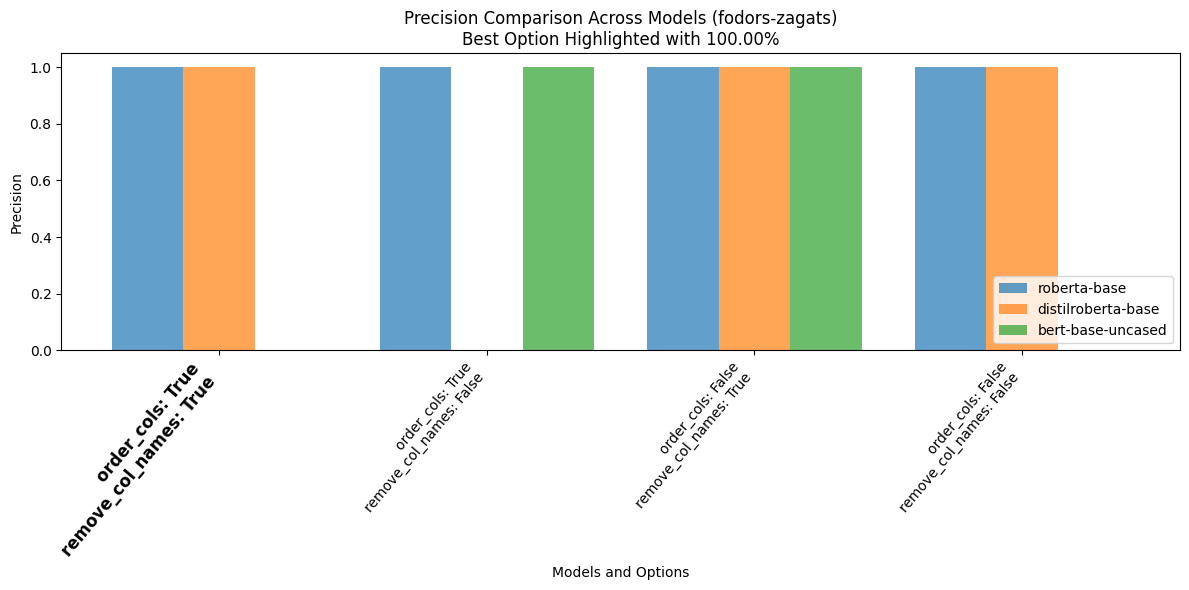

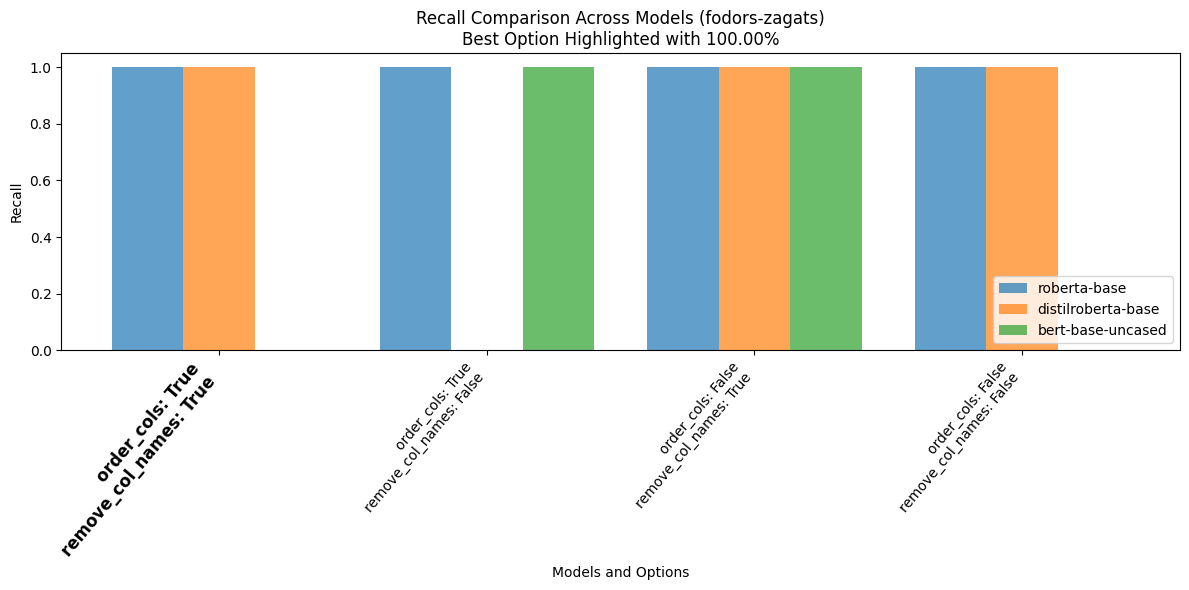

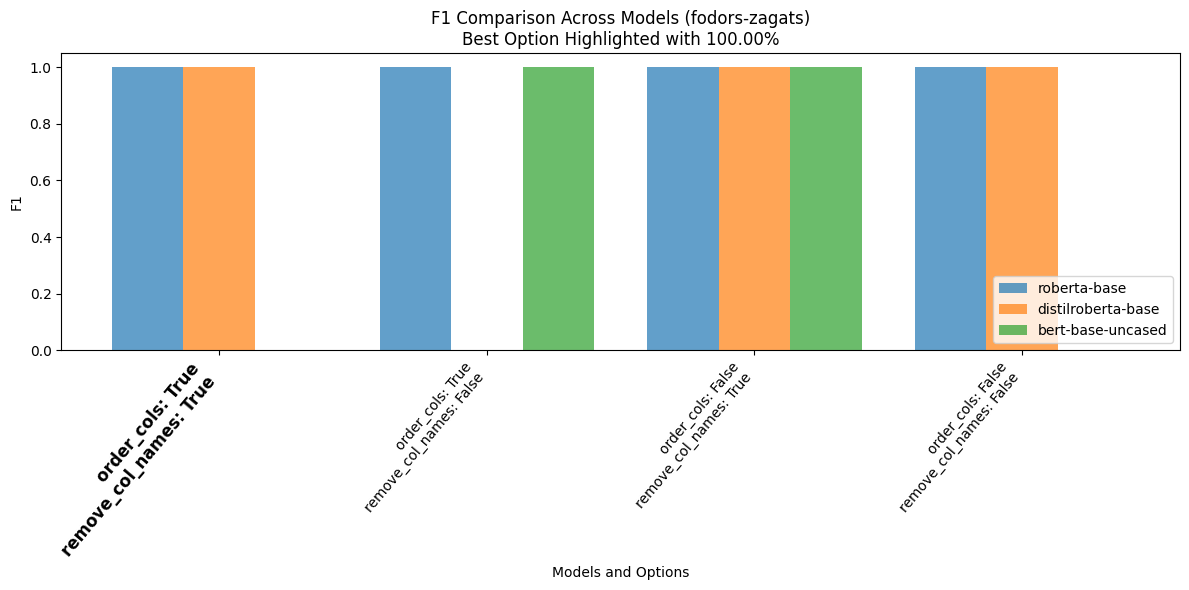

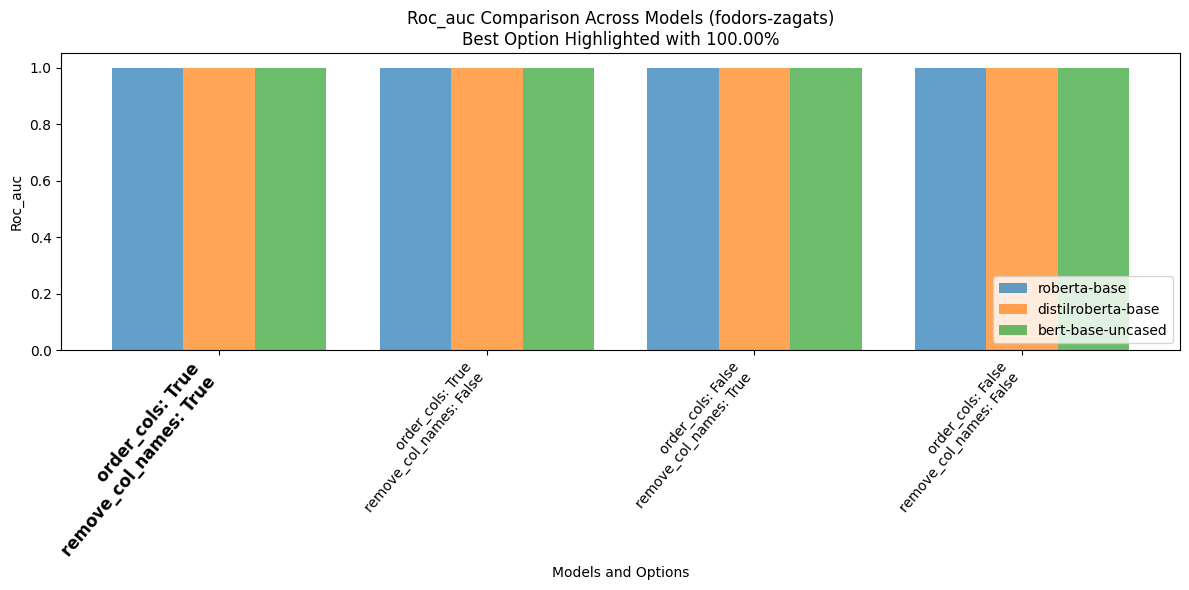

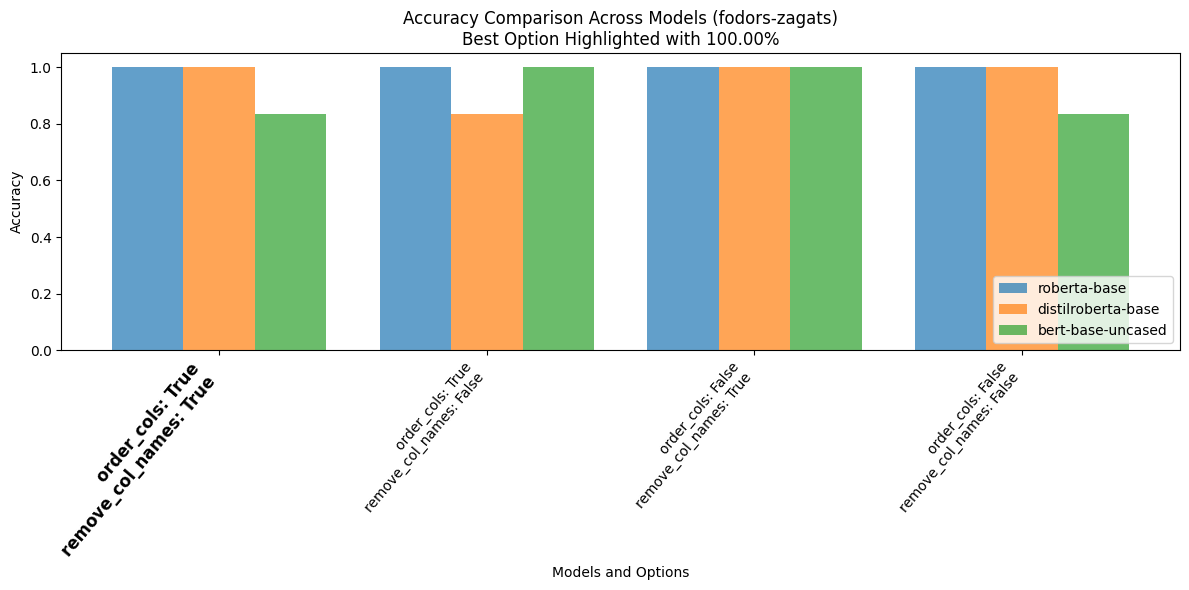

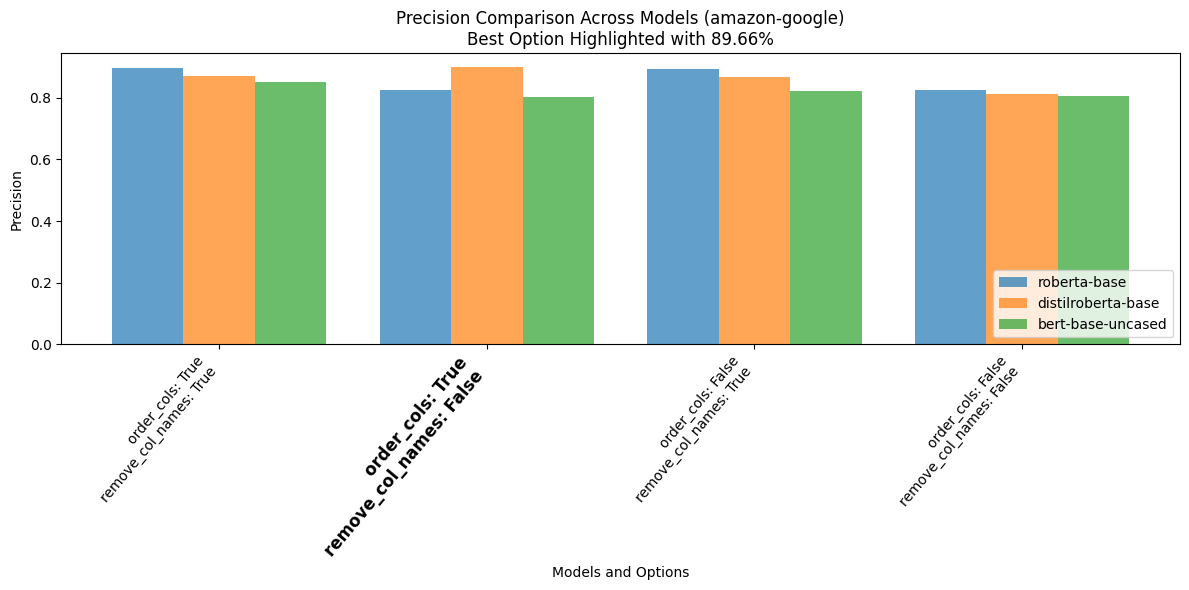

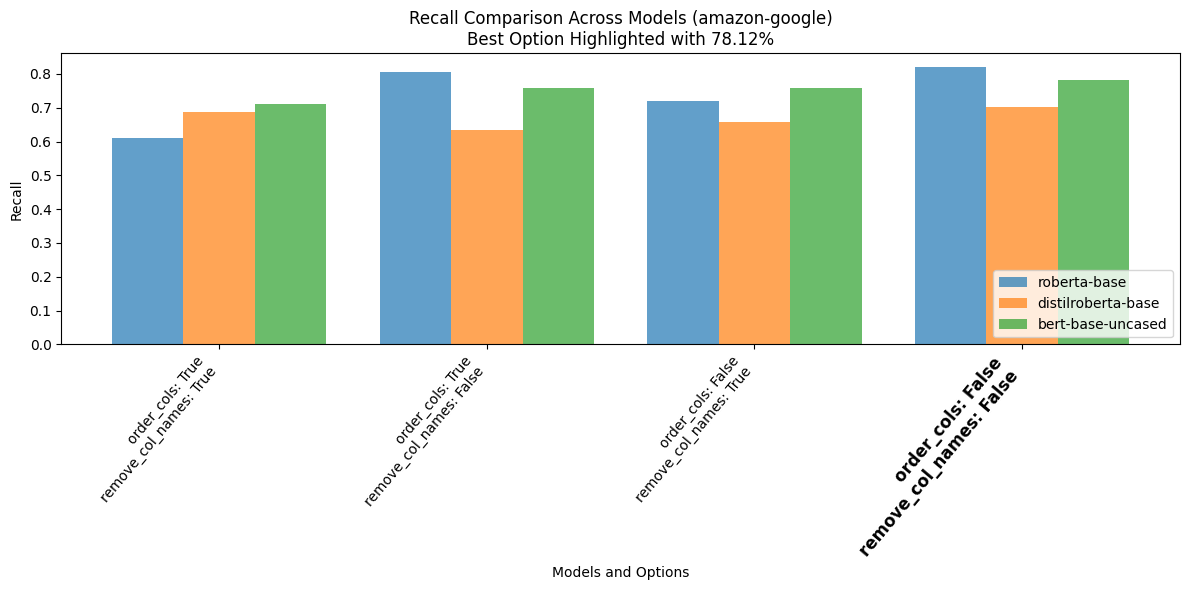

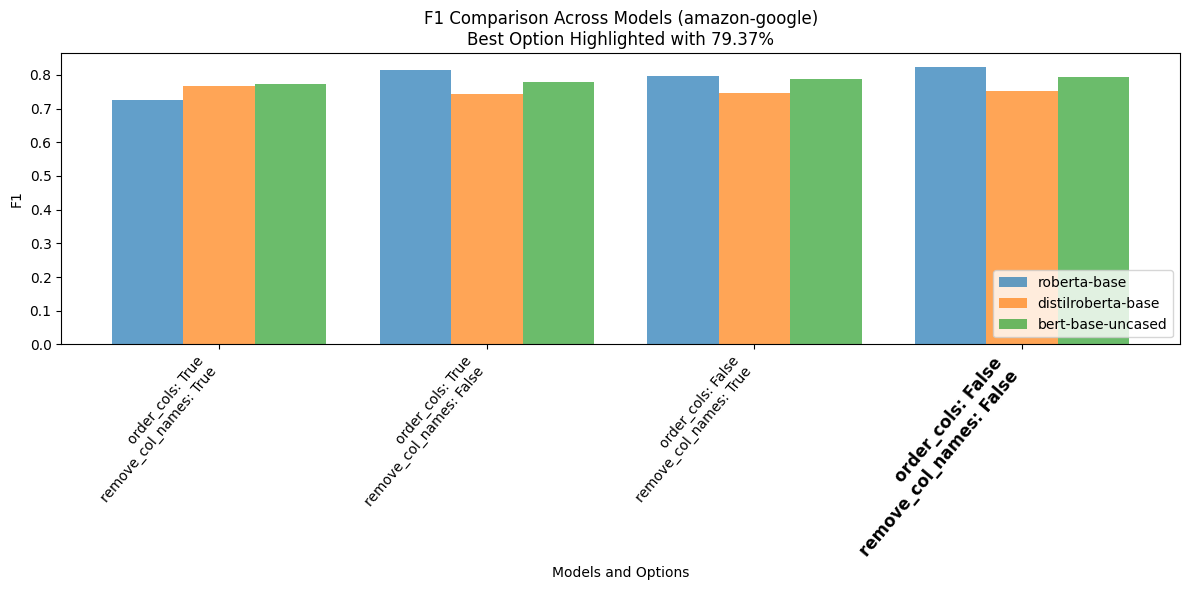

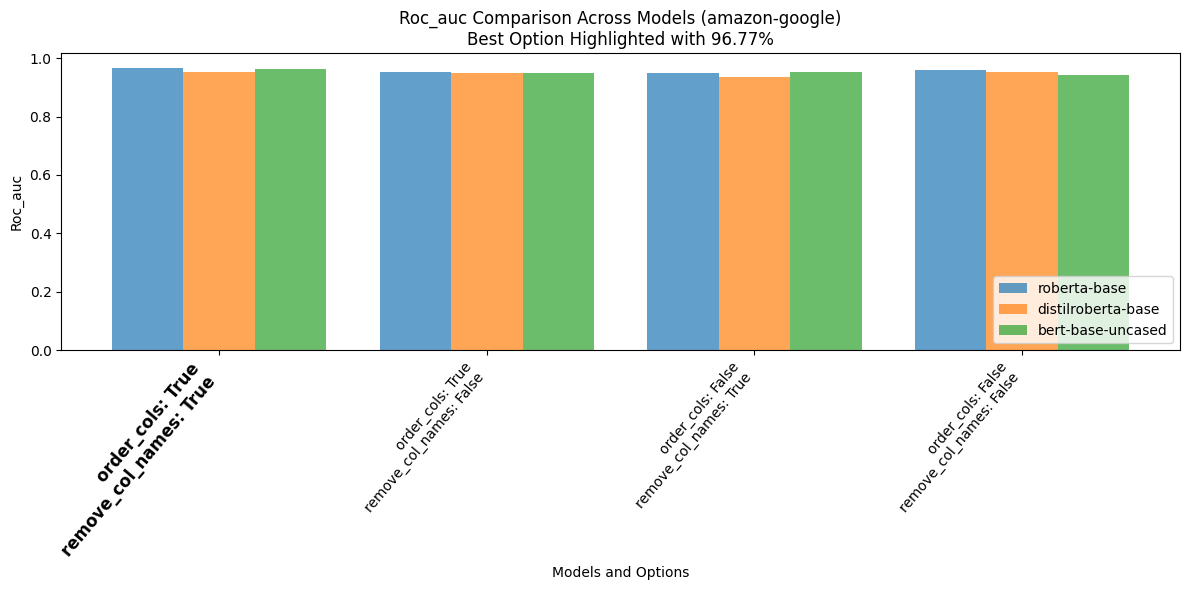

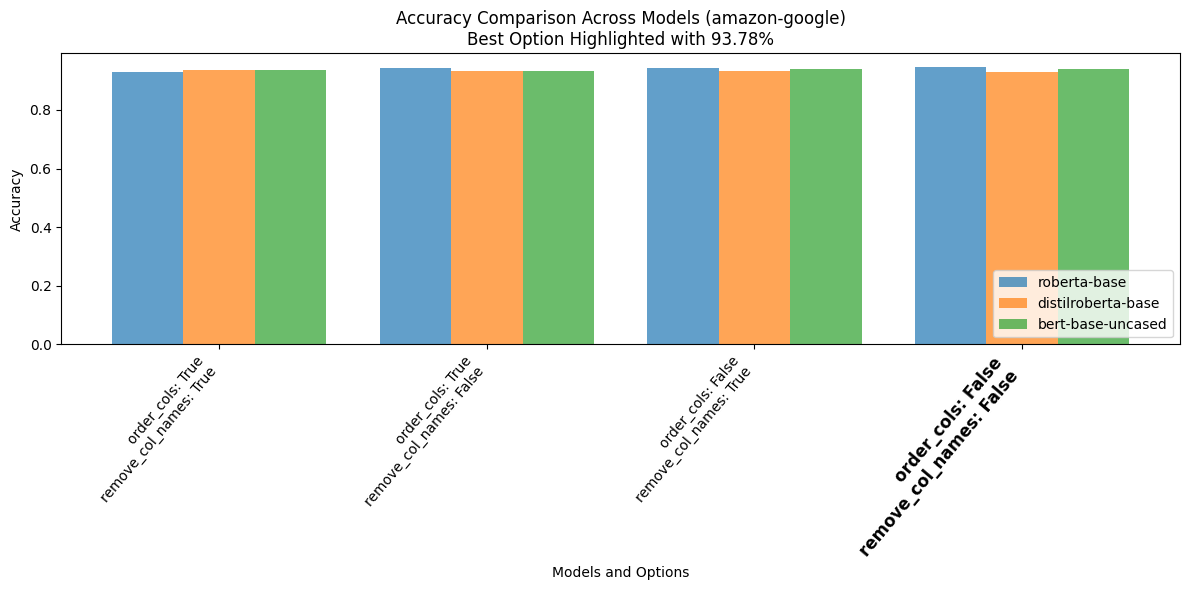

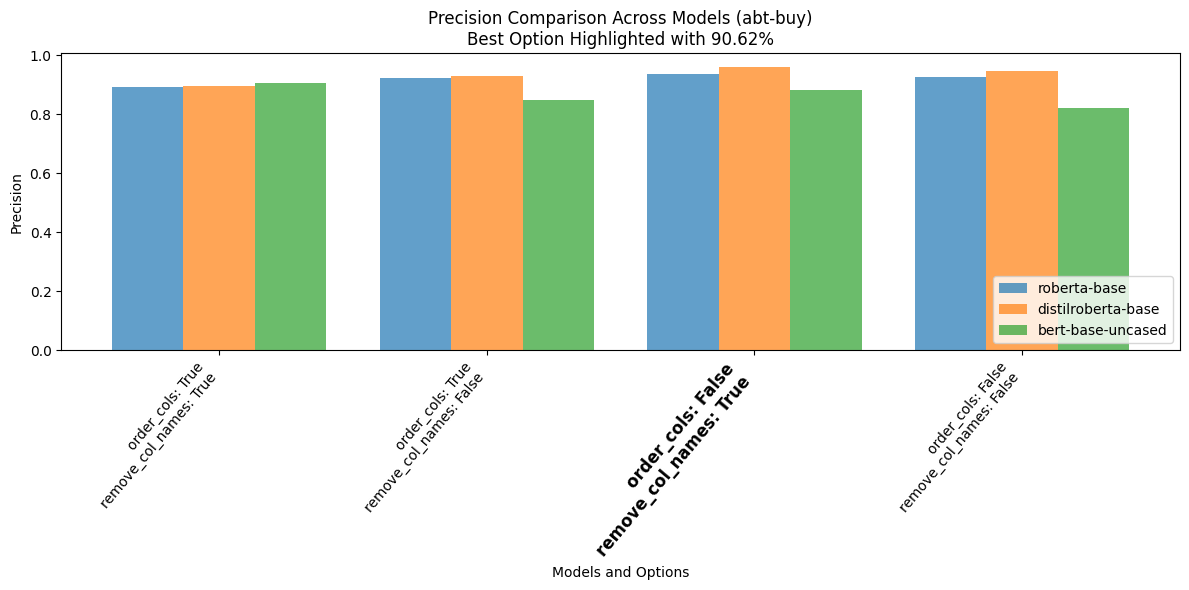

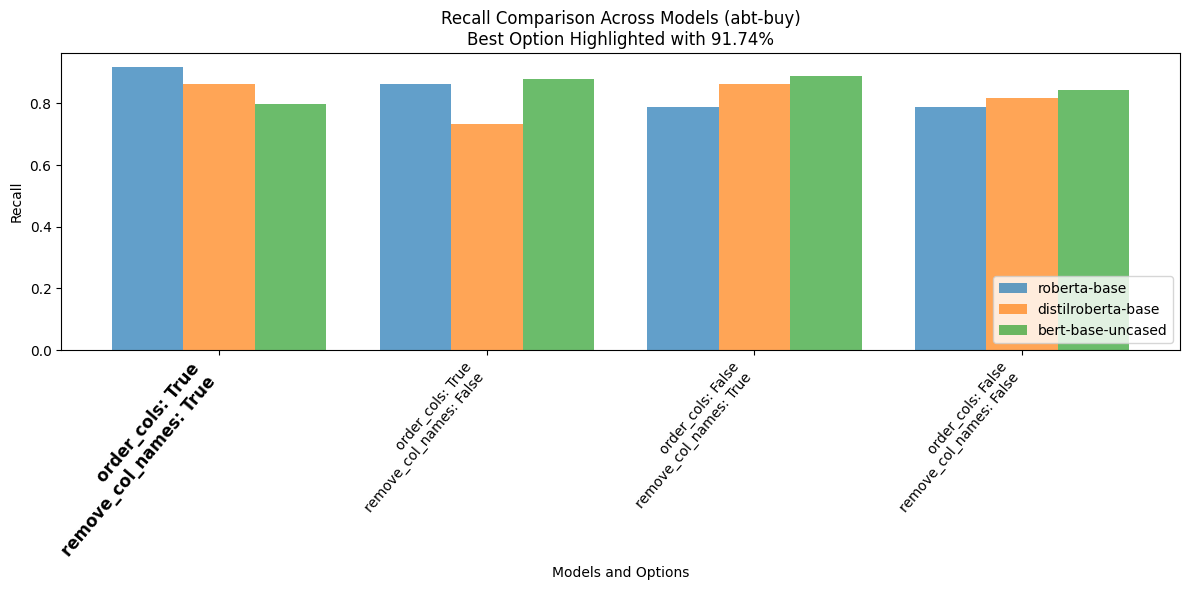

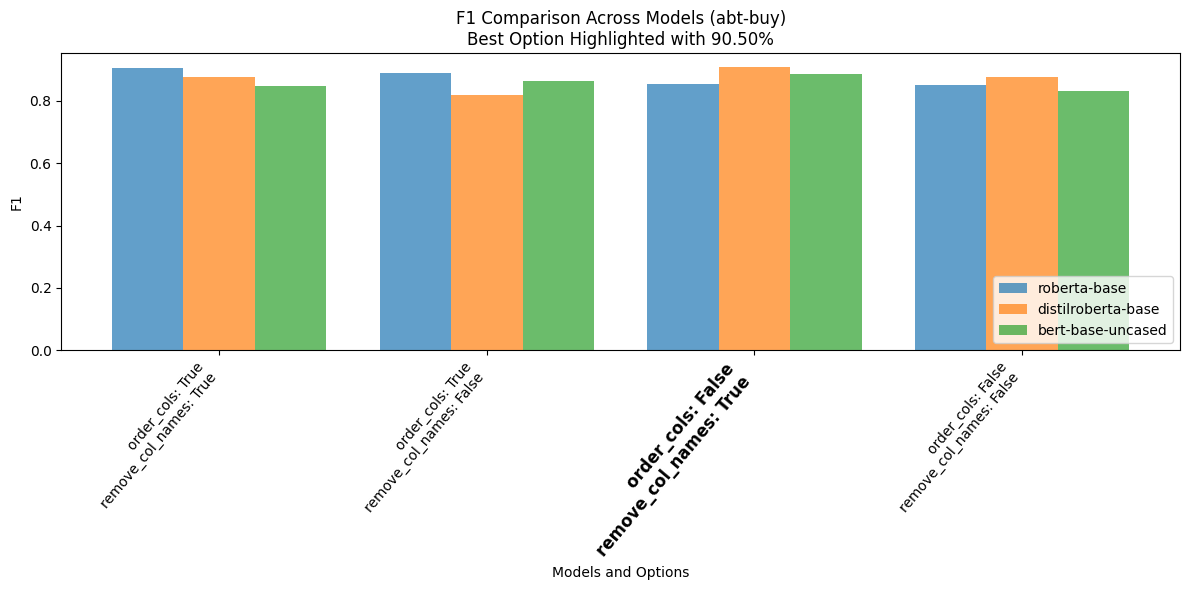

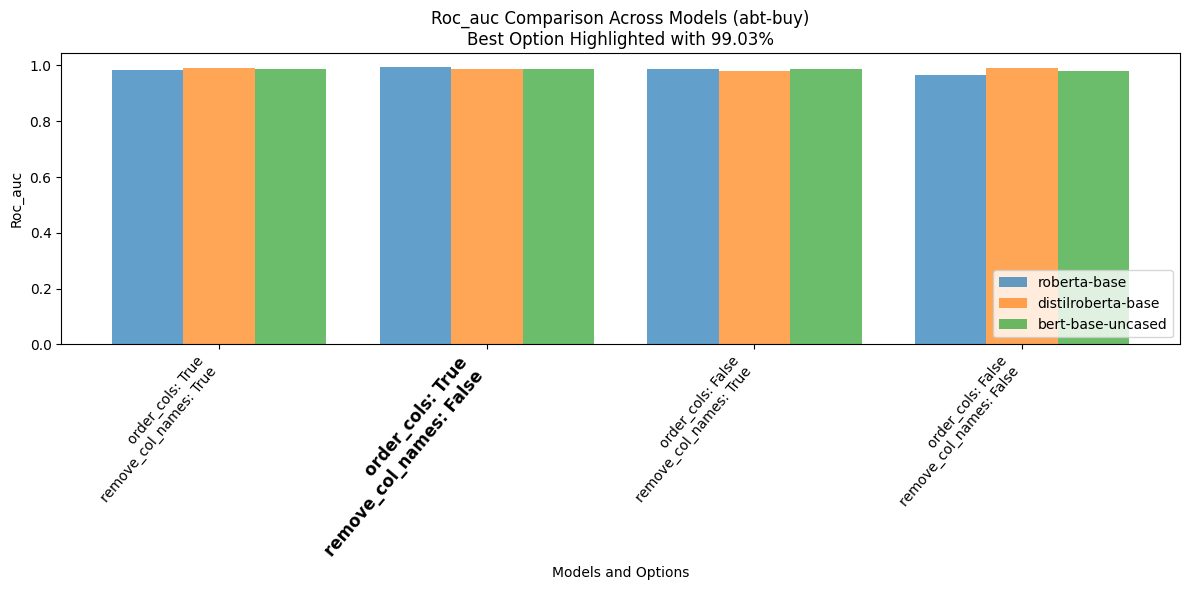

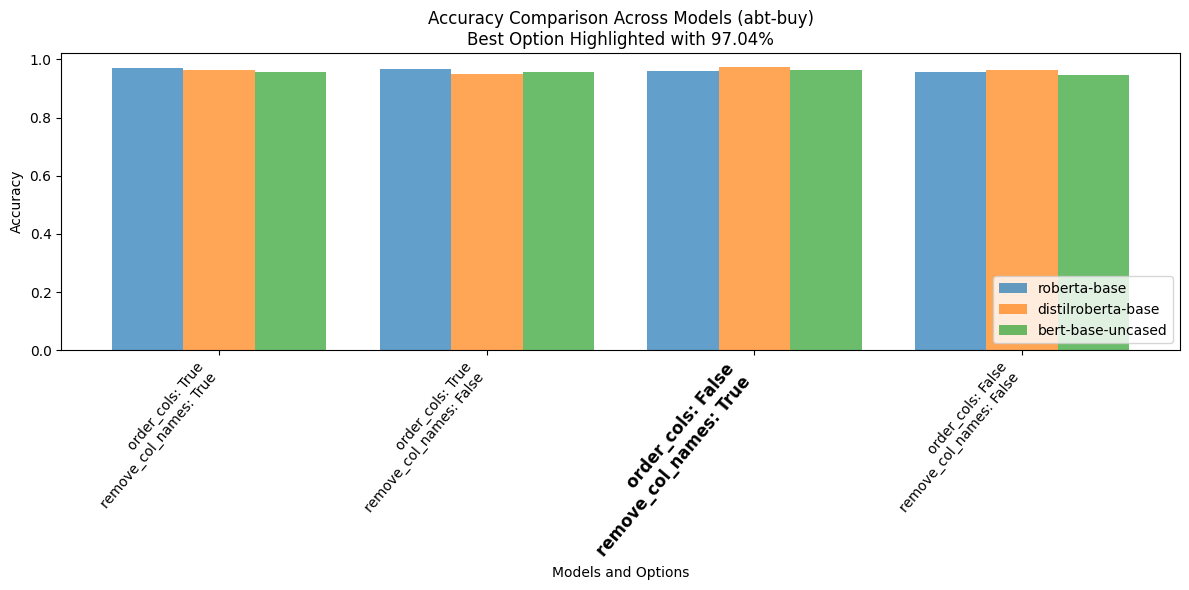

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Extracting data
metrics_list = ['precision', 'recall', 'f1', 'roc_auc', 'accuracy']
datasets = results_dict.keys()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

for data_name in datasets:
    for metric in metrics_list:
        fig, ax = plt.subplots(figsize=(12, 6))
        model_names = list(results_dict[data_name].keys())
        num_models = len(model_names)
        values = [[] for _ in range(num_models)]
        labels = []
        color_map = []
        for model_idx, model_name in enumerate(model_names):
            for order_cols in results_dict[data_name][model_name].keys():
                for remove_col_names in results_dict[data_name][model_name][order_cols].keys():
                    if model_idx == 0:
                        labels.append(f"order_cols: {order_cols}\nremove_col_names: {remove_col_names}")
                    values[model_idx].append(results_dict[data_name][model_name][order_cols][remove_col_names][metric])
                    color_map.append(colors[model_idx % len(colors)])
        
        x = np.arange(len(labels))
        bar_width = 0.8 / num_models  # Adjust the width of the bars
        for i in range(num_models):
            ax.bar(x + i * bar_width, values[i], bar_width, color=colors[i % len(colors)], alpha=0.7, label=model_names[i])
        
        ax.set_xticks(x + bar_width * (num_models - 1) / 2)
        ax.set_xticklabels(labels, rotation=50, ha='right')
        ax.set_title(f"{metric.capitalize()} Comparison Across Models ({data_name})\nBest Option Highlighted with {max(max(values)):.2%}")
        ax.set_xlabel("Models and Options")
        ax.set_ylabel(metric.capitalize())
        ax.legend(loc='lower right')
        
        # Highlight the best option
        best_option_idx = np.argmax([max(values[i]) for i in range(num_models)])
        best_label_idx = np.argmax(values[best_option_idx])
        ax.get_xticklabels()[best_label_idx].set_fontweight('bold')
        ax.get_xticklabels()[best_label_idx].set_fontsize(12)
        
        plt.tight_layout()
        plt.show()


### 2. Confusion Matrix Heatmap

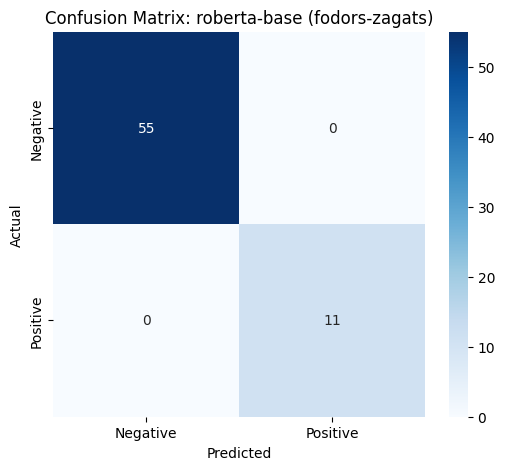

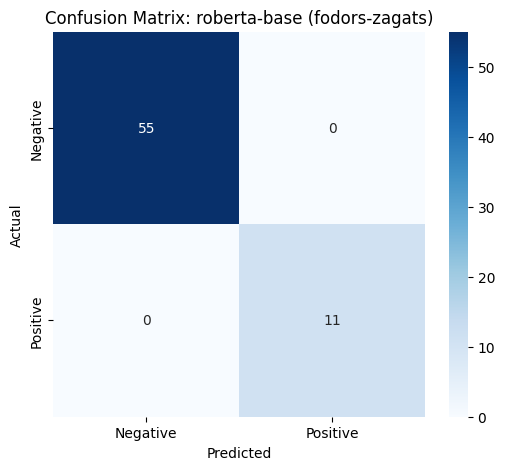

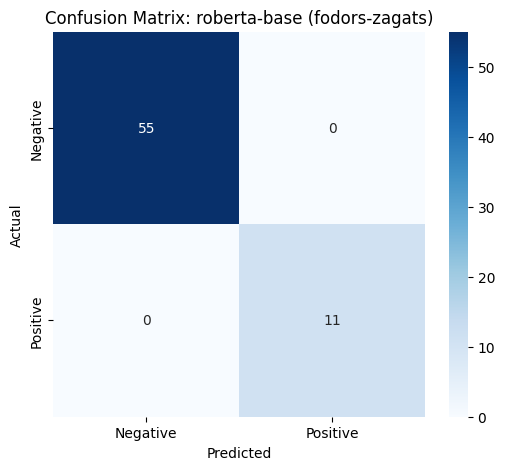

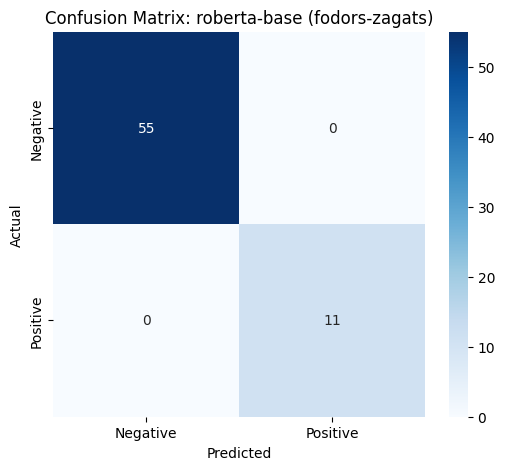

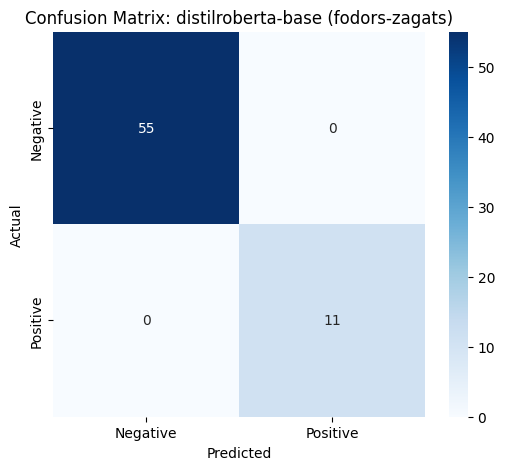

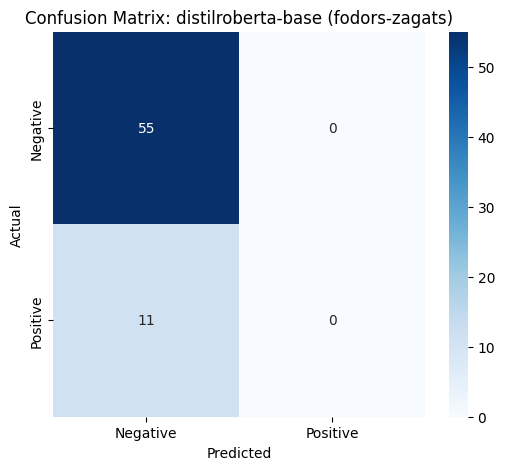

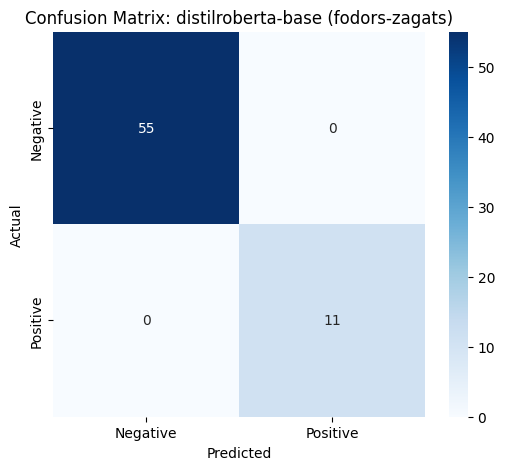

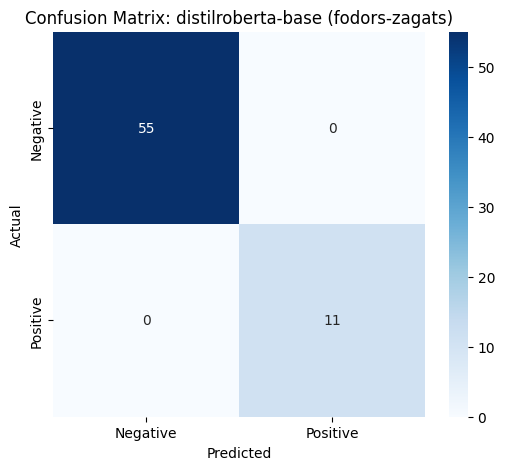

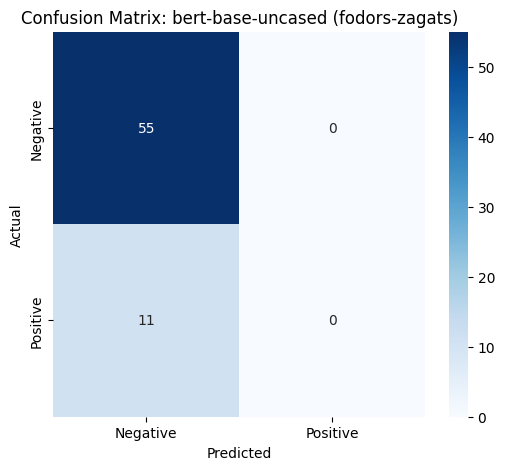

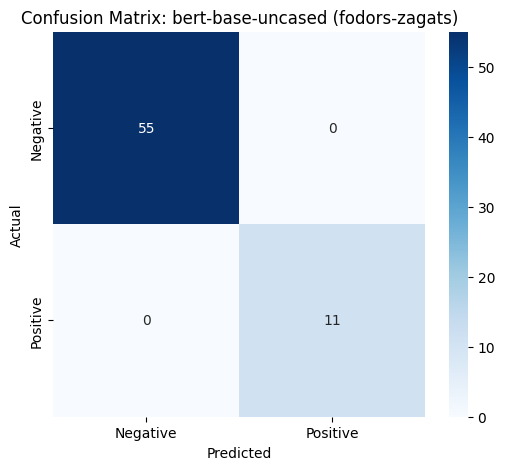

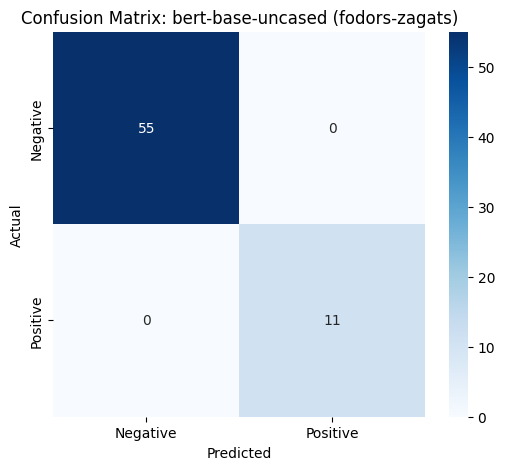

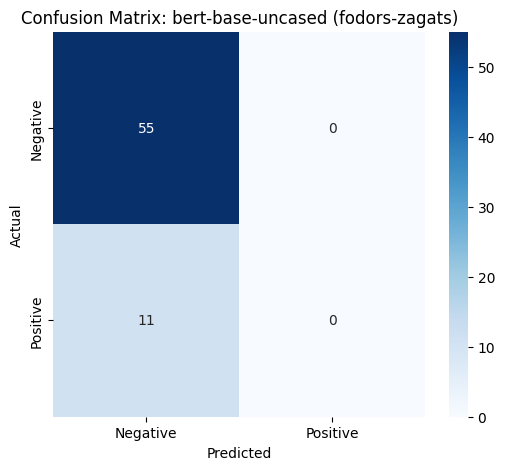

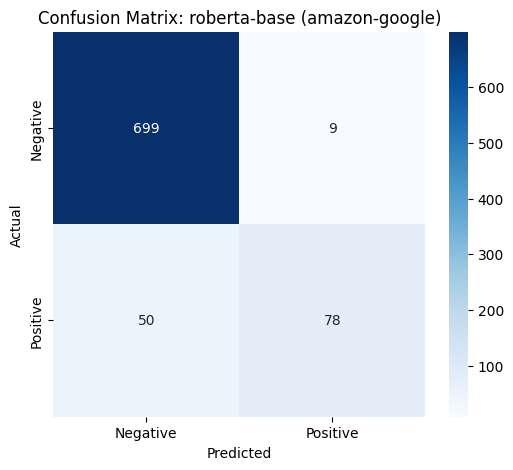

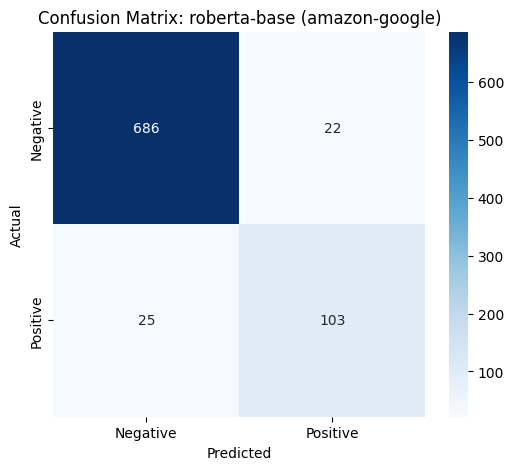

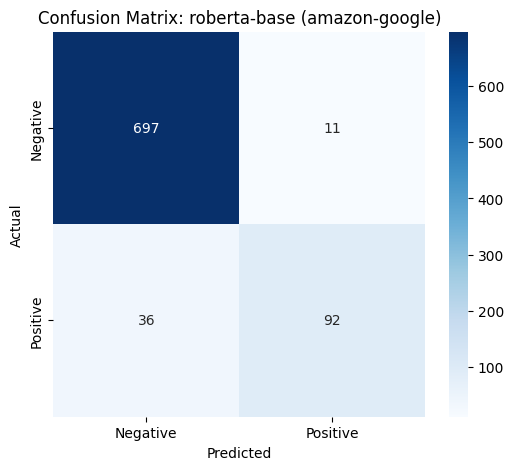

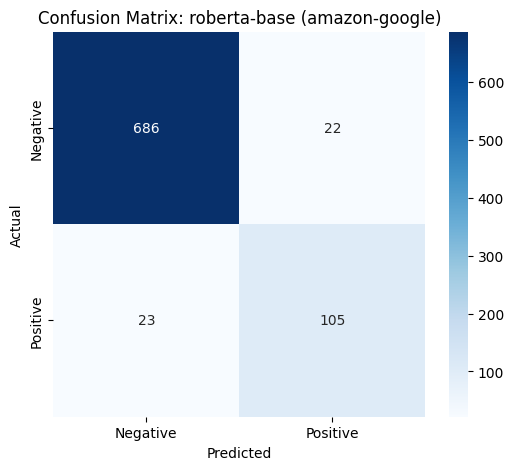

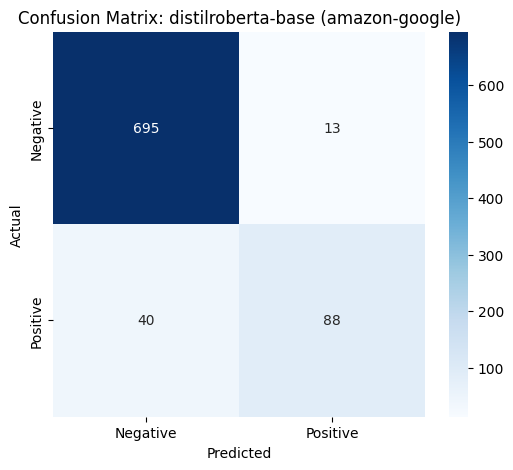

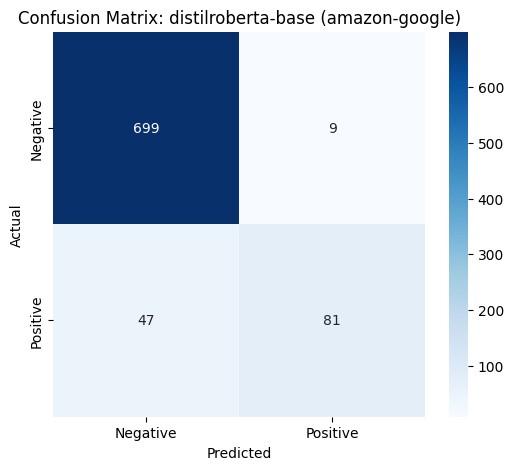

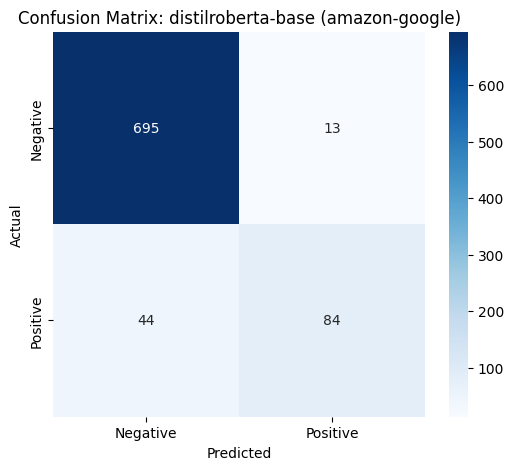

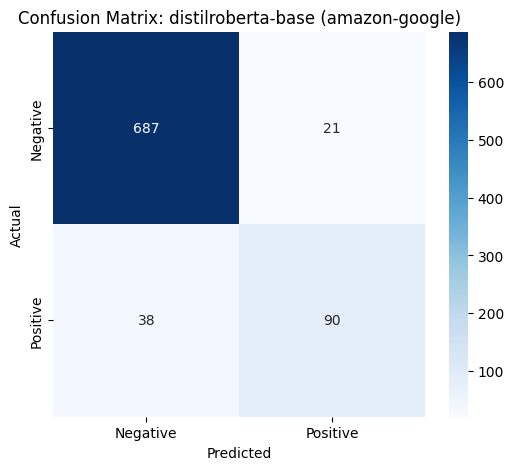

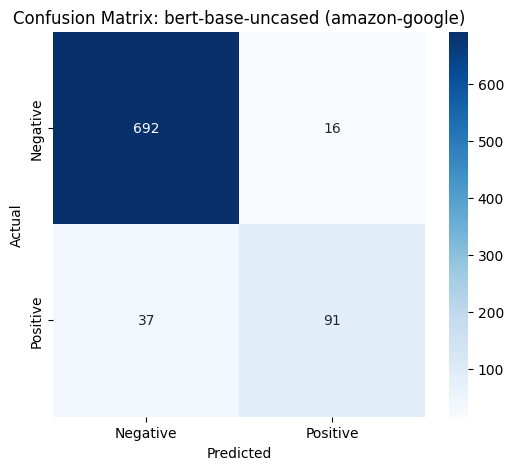

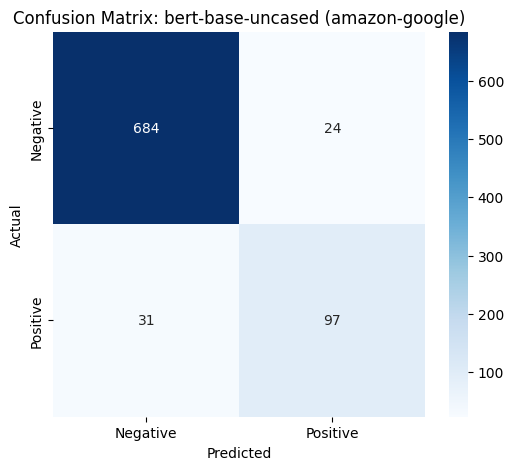

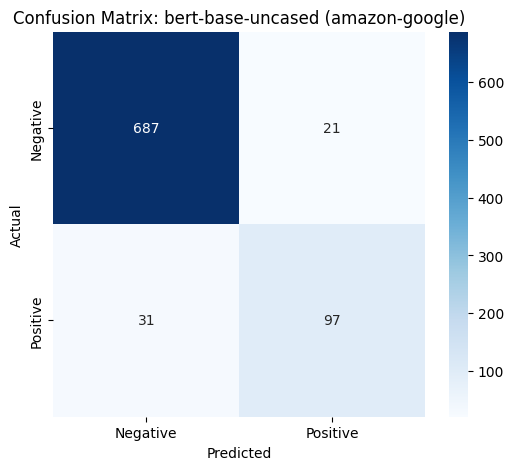

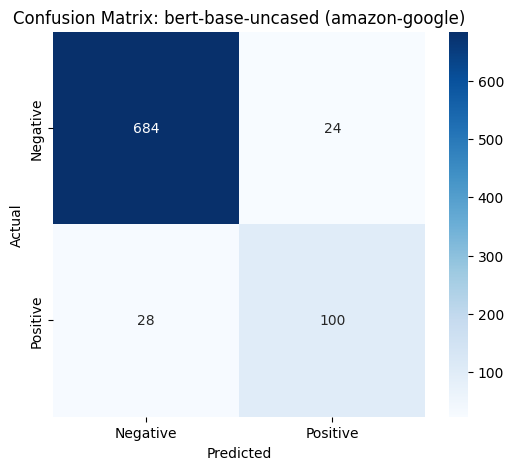

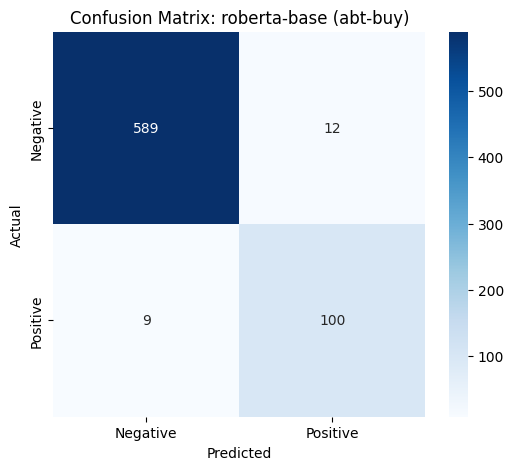

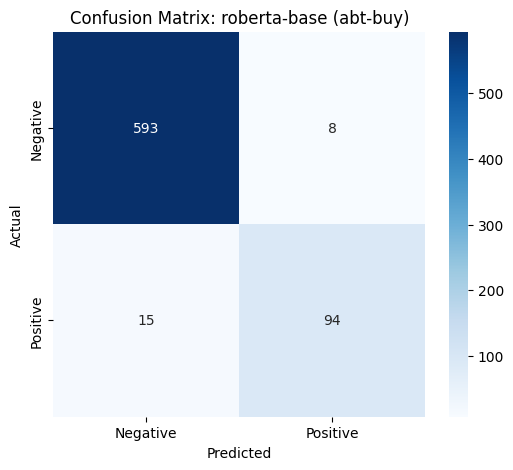

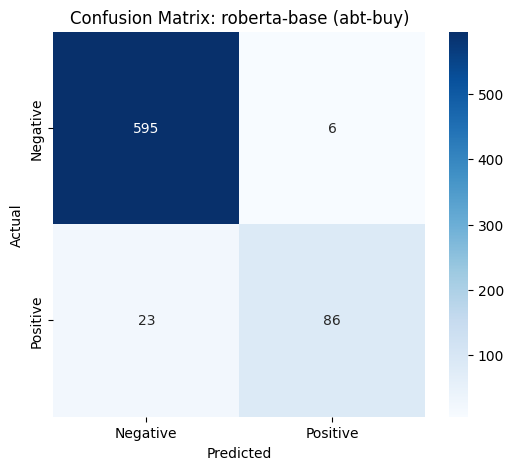

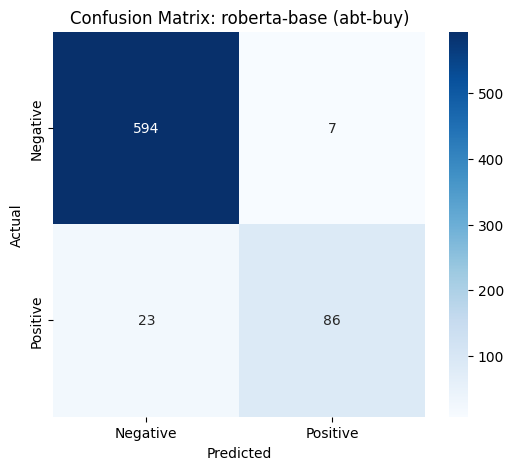

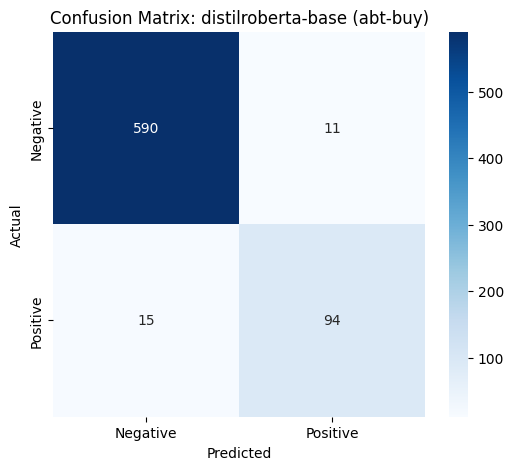

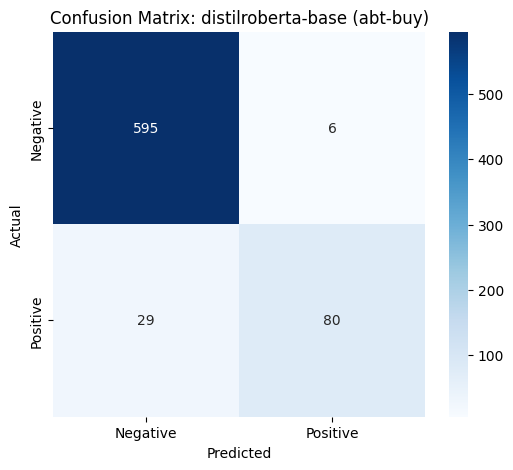

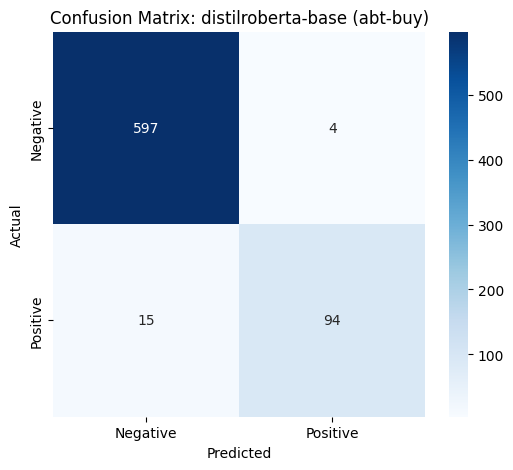

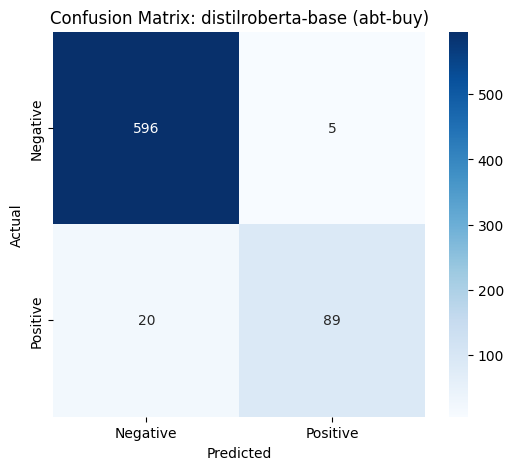

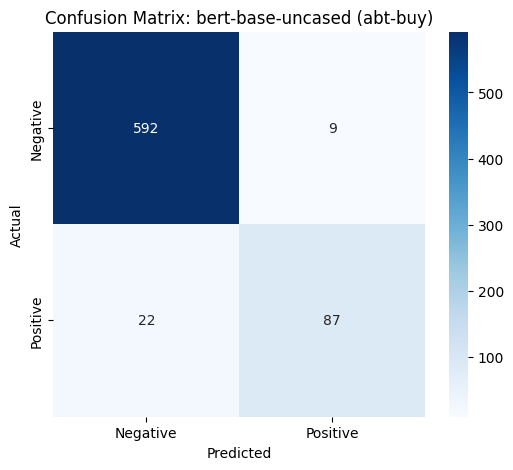

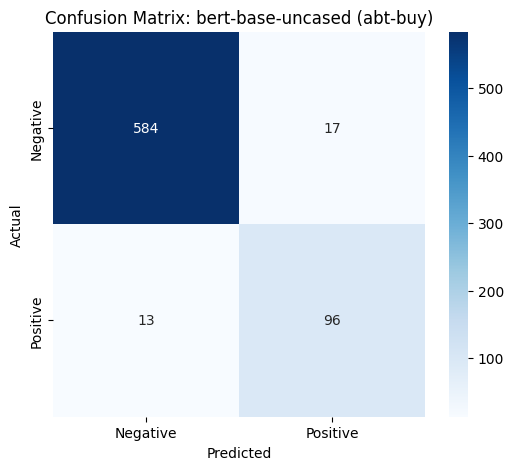

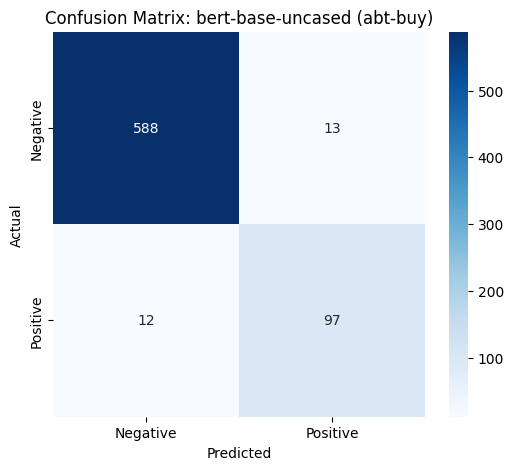

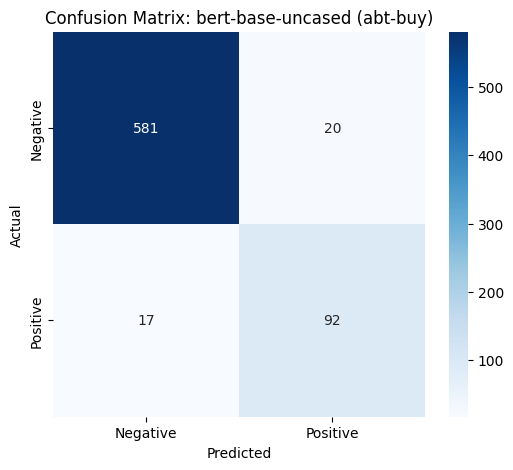

In [8]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

for data_name, models in results_dict.items():
    for model_name, orders in models.items():
        for order_cols, removes in orders.items():
            for remove_col_names, metrics in removes.items():
                cm = np.array(metrics["confusion_matrix"])
                plt.figure(figsize=(6, 5))
                sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
                plt.xlabel("Predicted")
                plt.ylabel("Actual")
                plt.title(f"Confusion Matrix: {model_name} ({data_name})")
                plt.show()

### 3. ROC Curve for Classification Models

<Figure size 1000x600 with 0 Axes>

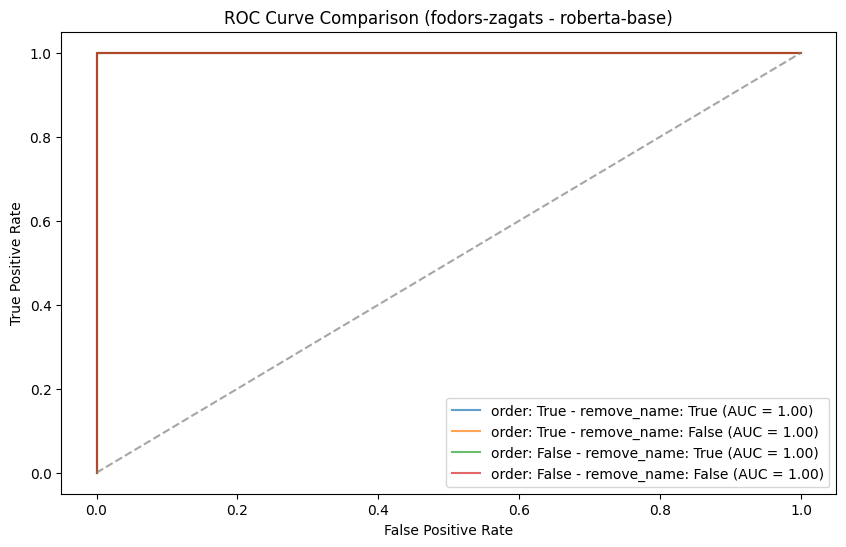

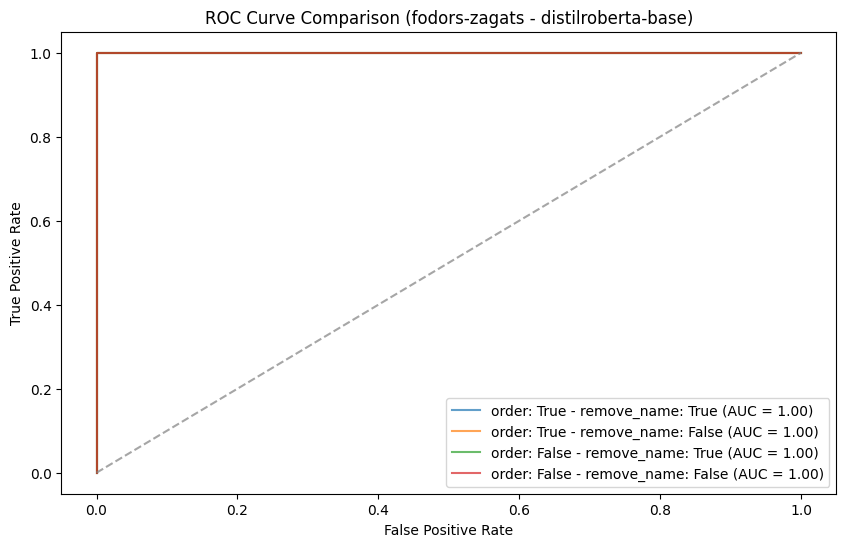

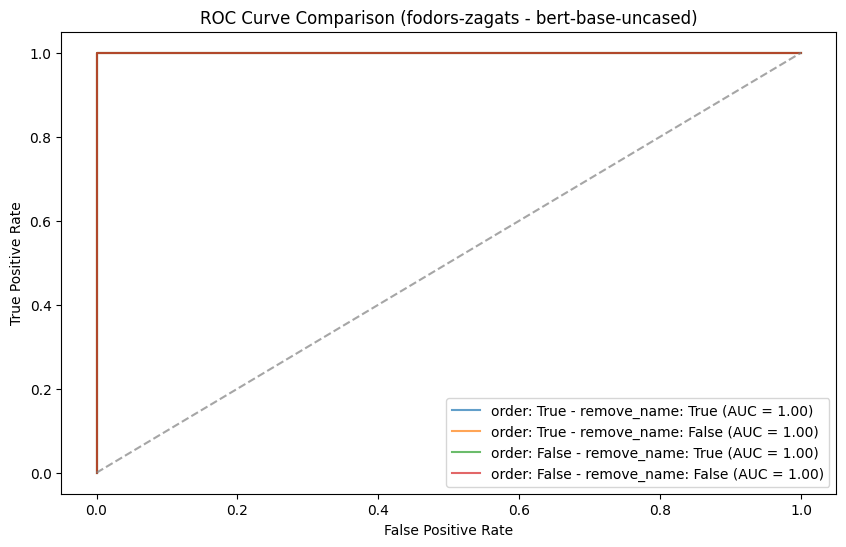

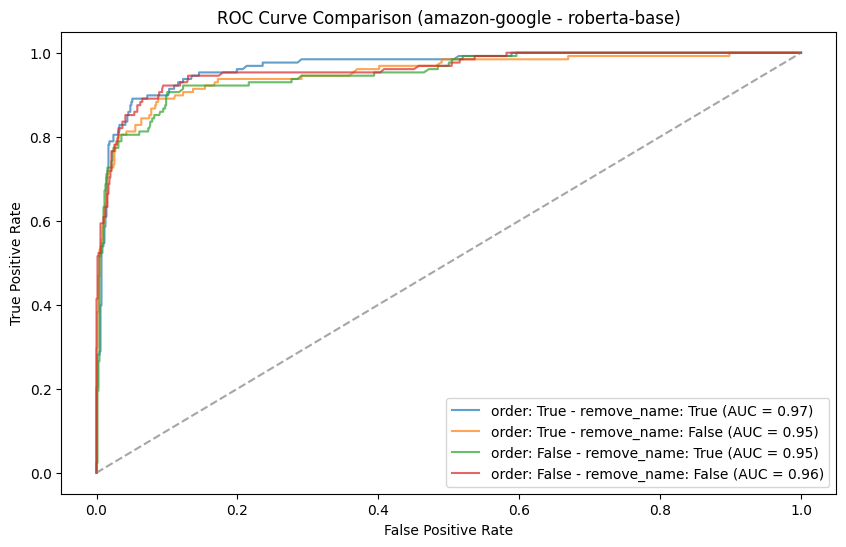

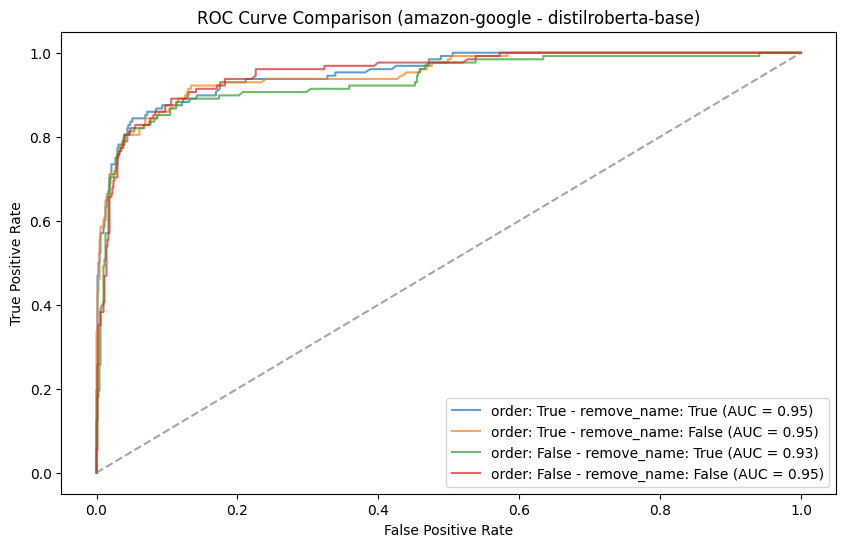

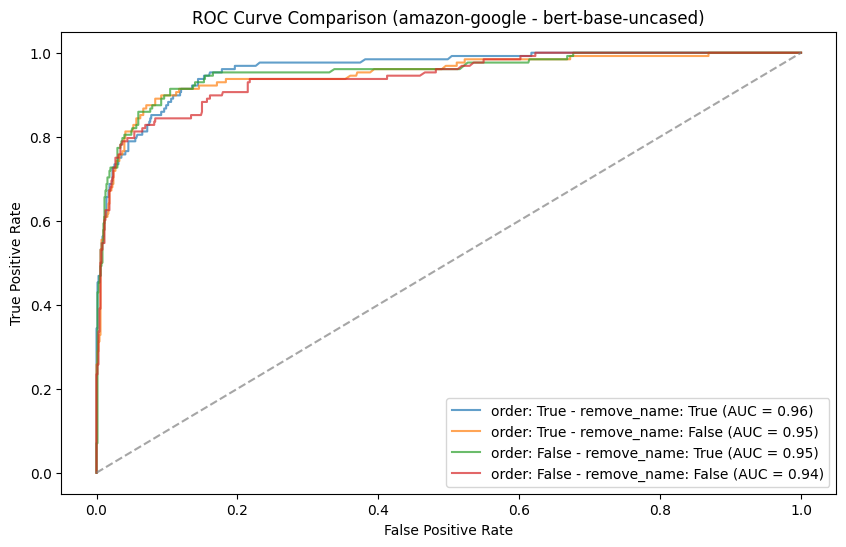

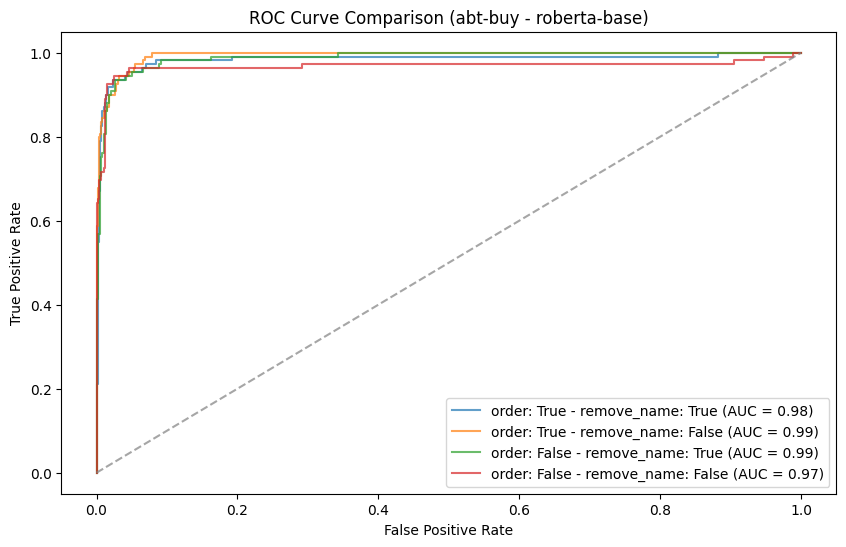

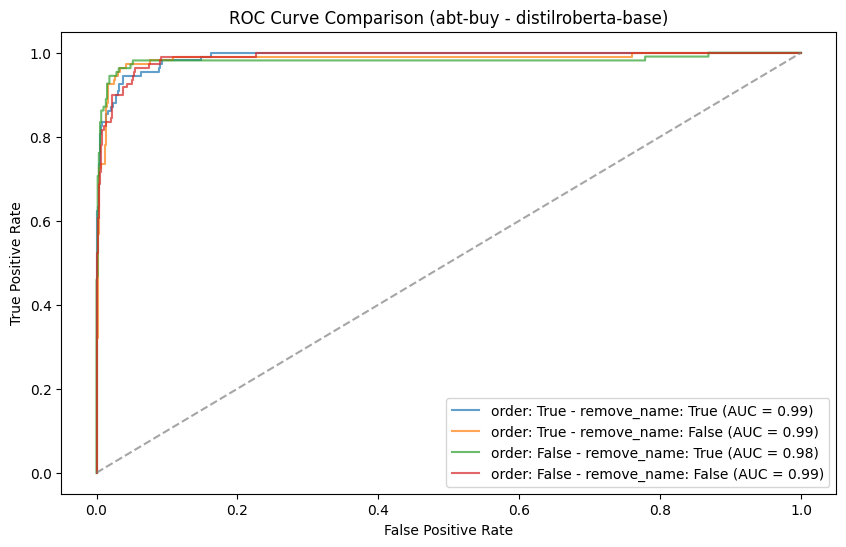

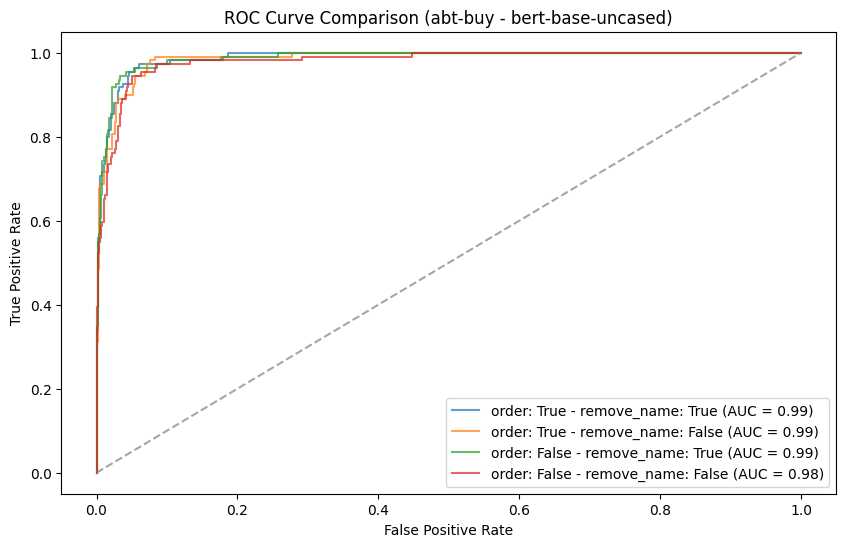

In [9]:
from sklearn.metrics import roc_curve, auc

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

plt.figure(figsize=(10, 6))

for data_name, models in results_dict.items():
    for model_name, orders in models.items():
        plt.figure(figsize=(10, 6))
        for order_cols, removes in orders.items():
            for remove_col_names, metrics in removes.items():
                fpr, tpr, auc_score = metrics["roc_curve"]
                plt.plot(fpr, tpr, label=f"order: {order_cols} - remove_name: {remove_col_names} (AUC = {auc_score:.2f})", alpha=0.7)

        plt.plot([0, 1], [0, 1], linestyle="--", color="gray", alpha=0.7)
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve Comparison ({data_name} - {model_name})")
        plt.legend()
        plt.show()

### 4. Table of Metrics

In [10]:
import pandas as pd

all_results = []

for data_name, models in results_dict.items():
    for model_name, orders in models.items():
        for order_cols, removes in orders.items():
            for remove_col_names, metrics in removes.items():
                all_results.append([
                    data_name, model_name, order_cols, remove_col_names,
                    metrics["precision"], metrics["recall"], metrics["f1"],
                    metrics["roc_auc"], metrics["accuracy"], metrics["train_time"]
                ])

df_results = pd.DataFrame(all_results, columns=["Dataset", "Model", "Order Cols", "Remove Cols",
                                                 "Precision", "Recall", "F1", "ROC AUC", "Accuracy", "Train Time (in seconds)"])

df_results

Dataset               Model  Order Cols  Remove Cols  Precision  \
0   fodors-zagats        roberta-base        True         True   1.000000   
1   fodors-zagats        roberta-base        True        False   1.000000   
2   fodors-zagats        roberta-base       False         True   1.000000   
3   fodors-zagats        roberta-base       False        False   1.000000   
4   fodors-zagats  distilroberta-base        True         True   1.000000   
5   fodors-zagats  distilroberta-base        True        False   0.000000   
6   fodors-zagats  distilroberta-base       False         True   1.000000   
7   fodors-zagats  distilroberta-base       False        False   1.000000   
8   fodors-zagats   bert-base-uncased        True         True   0.000000   
9   fodors-zagats   bert-base-uncased        True        False   1.000000   
10  fodors-zagats   bert-base-uncased       False         True   1.000000   
11  fodors-zagats   bert-base-uncased       False        False   0.000000   
12  amazon-google        roberta-base        True         True   0.896552   
13  amazon-google        roberta-base        True        False   0.824000   
14  amazon-google        roberta-base       False         True   0.893204   
15  amazon-google        roberta-base       False        False   0.826772   
16  amazon-google  distilroberta-base        True         True   0.871287   
17  amazon-google  distilroberta-base        True        False   0.900000   
18  amazon-google  distilroberta-base       False         True   0.865979   
19  amazon-google  distilroberta-base       False        False   0.810811   
20  amazon-google   bert-base-uncased        True         True   0.850467   
21  amazon-google   bert-base-uncased        True        False   0.801653   
22  amazon-google   bert-base-uncased       False         True   0.822034   
23  amazon-google   bert-base-uncased       False        False   0.806452   
24        abt-buy        roberta-base        True         True   0.892857   
25        abt-buy        roberta-base        True        False   0.921569   
26        abt-buy        roberta-base       False         True   0.934783   
27        abt-buy        roberta-base       False        False   0.924731   
28        abt-buy  distilroberta-base        True         True   0.895238   
29        abt-buy  distilroberta-base        True        False   0.930233   
30        abt-buy  distilroberta-base       False         True   0.959184   
31        abt-buy  distilroberta-base       False        False   0.946809   
32        abt-buy   bert-base-uncased        True         True   0.906250   
33        abt-buy   bert-base-uncased        True        False   0.849558   
34        abt-buy   bert-base-uncased       False         True   0.881818   
35        abt-buy   bert-base-uncased       False        False   0.821429   

      Recall        F1   ROC AUC  Accuracy  Train Time (in seconds)  
0   1.000000  1.000000  1.000000  1.000000                61.892073  
1   1.000000  1.000000  1.000000  1.000000                61.710013  
2   1.000000  1.000000  1.000000  1.000000                61.647075  
3   1.000000  1.000000  1.000000  1.000000                61.725789  
4   1.000000  1.000000  1.000000  1.000000                31.428452  
5   0.000000  0.000000  1.000000  0.833333                31.444551  
6   1.000000  1.000000  1.000000  1.000000                31.458035  
7   1.000000  1.000000  1.000000  1.000000                31.420084  
8   0.000000  0.000000  1.000000  0.833333                61.579781  
9   1.000000  1.000000  1.000000  1.000000                61.592734  
10  1.000000  1.000000  1.000000  1.000000                61.613605  
11  0.000000  0.000000  1.000000  0.833333                61.595355  
12  0.609375  0.725581  0.967685  0.929426               773.681753  
13  0.804688  0.814229  0.951155  0.943780               773.807352  
14  0.718750  0.796537  0.950217  0.943780               773.776956  
15  0.820312  0.823529  0.960811  0.9461

### 5. Impact of the threshold on the metrics

Table A columns:
  column_name              data_example
1        addr  '435 s. la cienega blv.'
2        city             'los angeles'
3       phone              310/246-1501
4        type                  american 

Table B columns:
  column_name           data_example
1        addr  '10801 w. pico blvd.'
2        city              'west la'
3       phone           310-475-3585
4        type               american 

Serialized entities 



/Users/ttperr/Documents/Code/Pro/Work/WavER/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


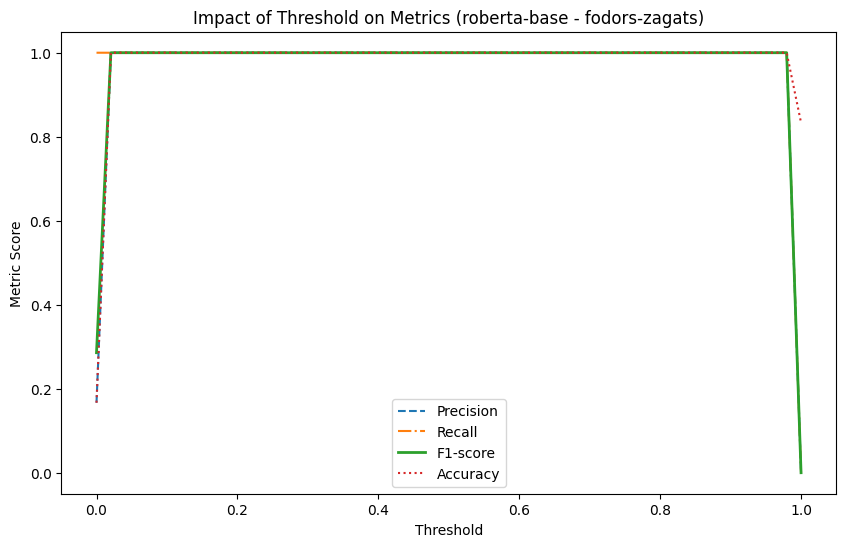

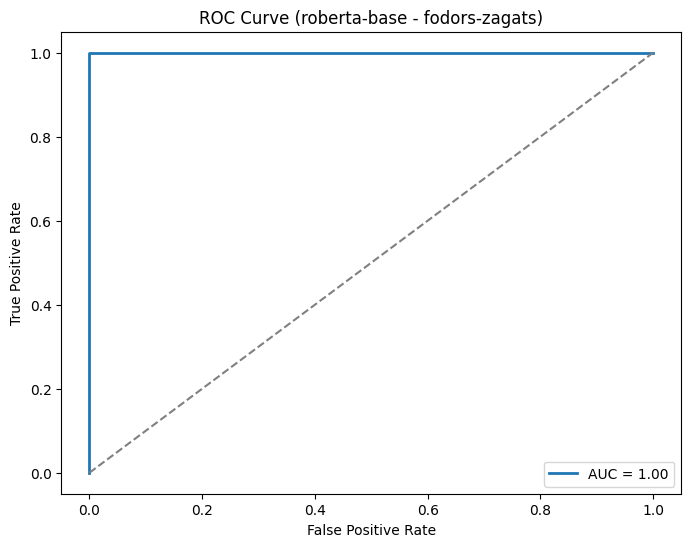

/Users/ttperr/Documents/Code/Pro/Work/WavER/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ttperr/Documents/Code/Pro/Work/WavER/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


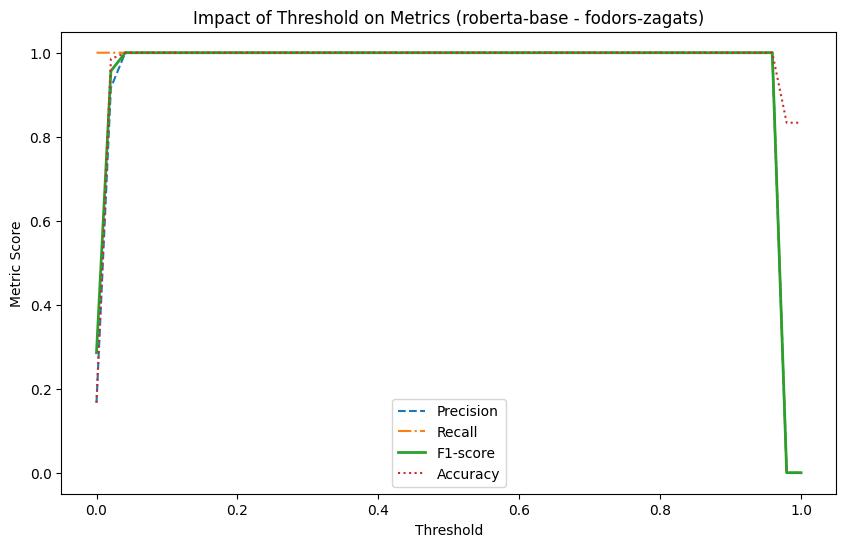

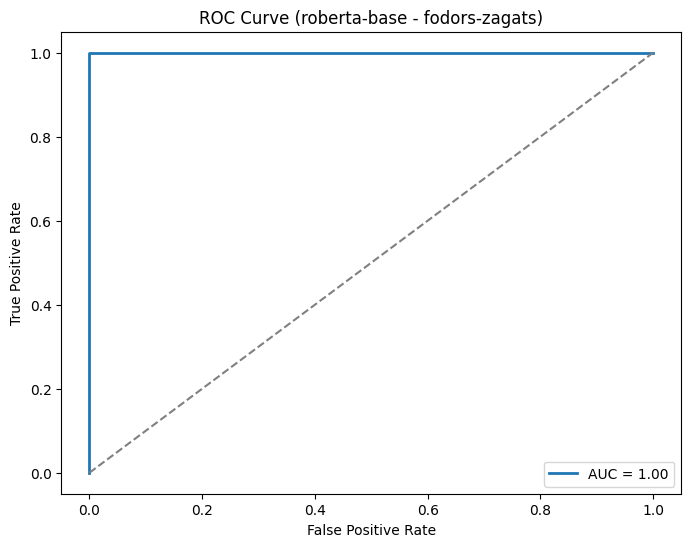

/Users/ttperr/Documents/Code/Pro/Work/WavER/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


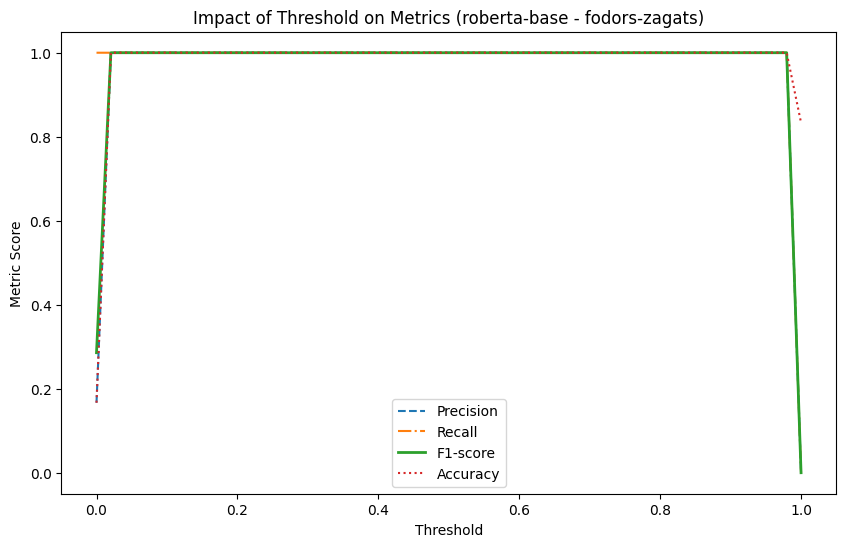

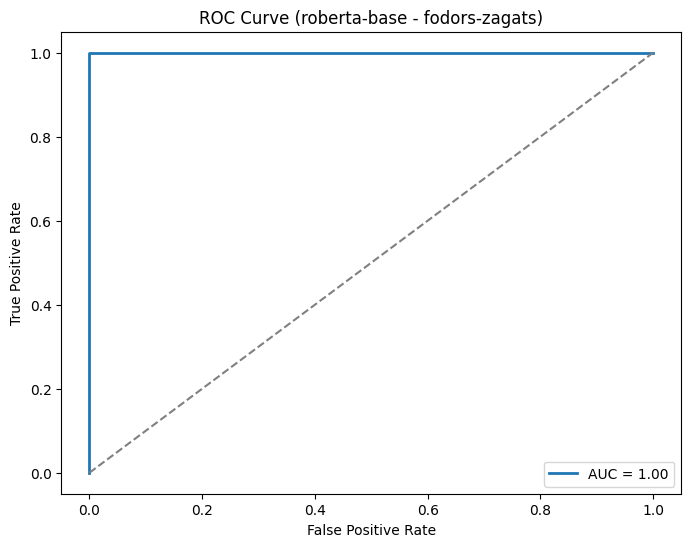

/Users/ttperr/Documents/Code/Pro/Work/WavER/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


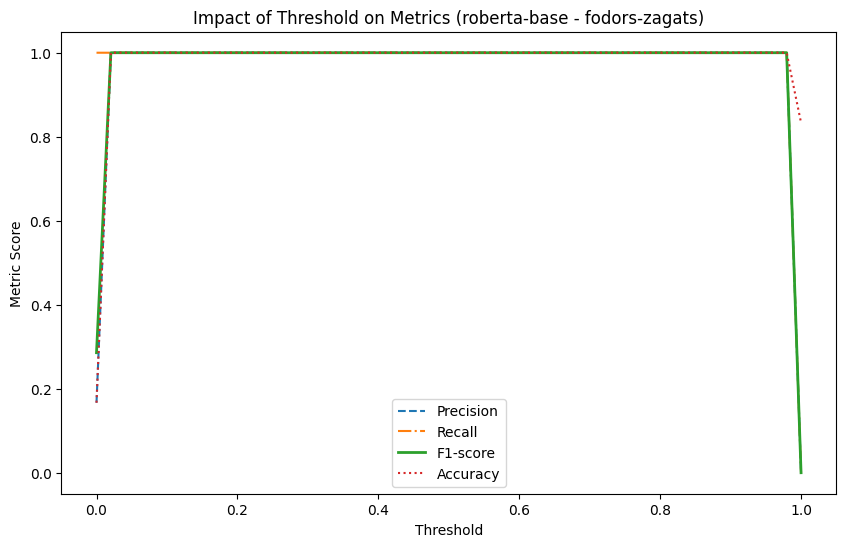

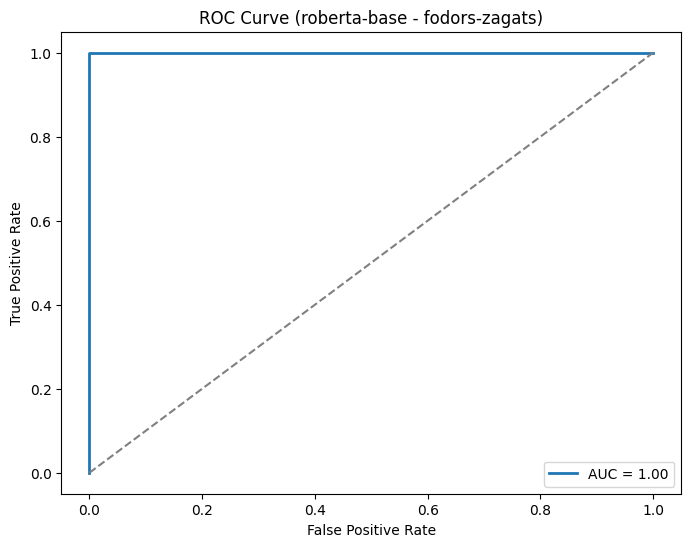

/Users/ttperr/Documents/Code/Pro/Work/WavER/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ttperr/Documents/Code/Pro/Work/WavER/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ttperr/Documents/Code/Pro/Work/WavER/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

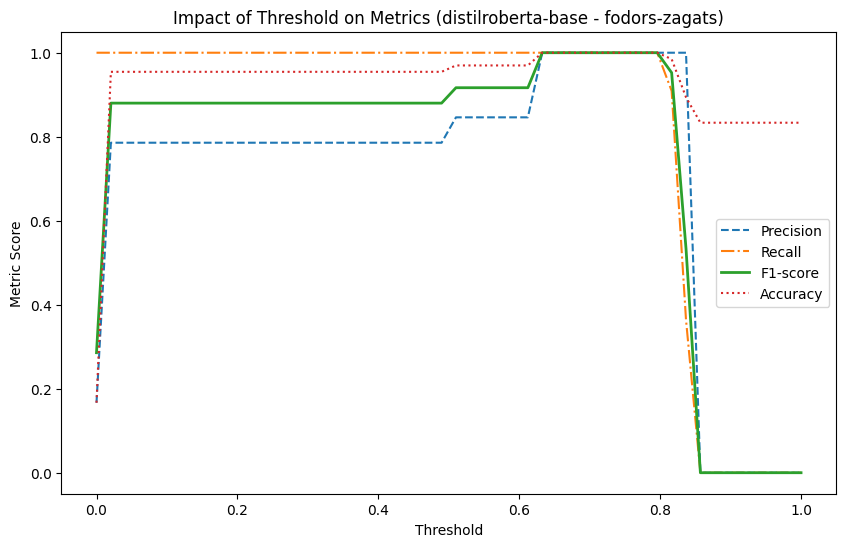

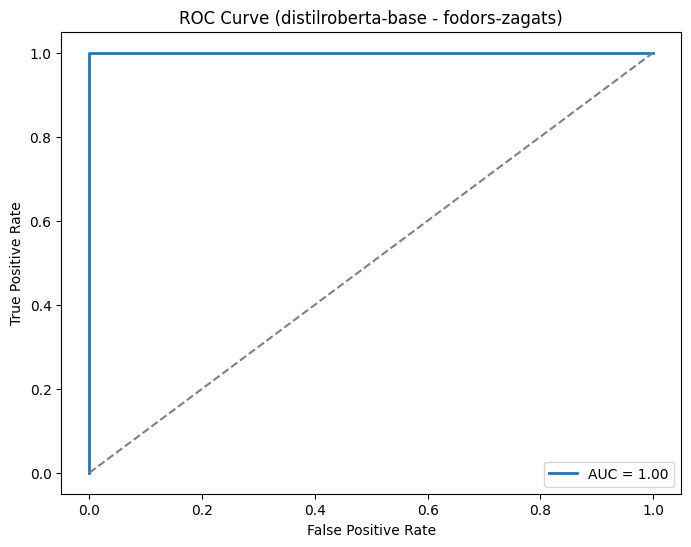

/Users/ttperr/Documents/Code/Pro/Work/WavER/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ttperr/Documents/Code/Pro/Work/WavER/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ttperr/Documents/Code/Pro/Work/WavER/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

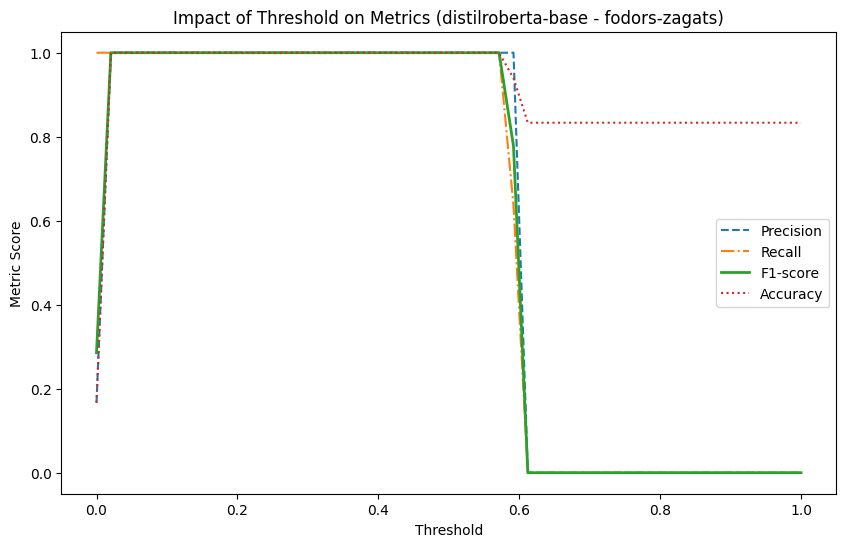

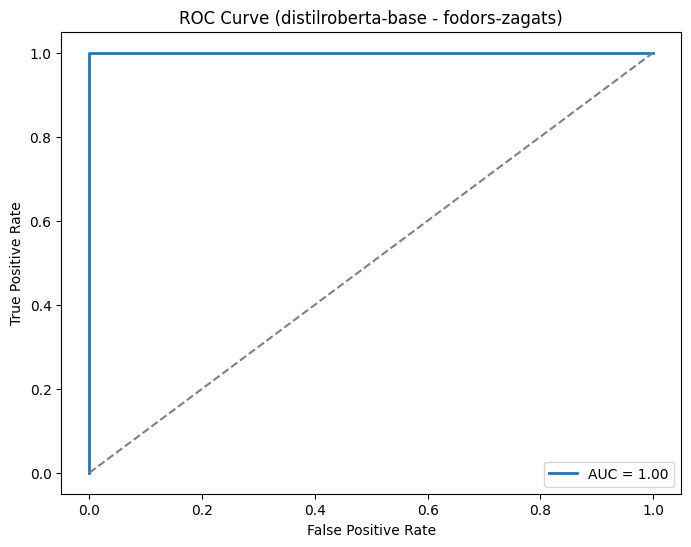

/Users/ttperr/Documents/Code/Pro/Work/WavER/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


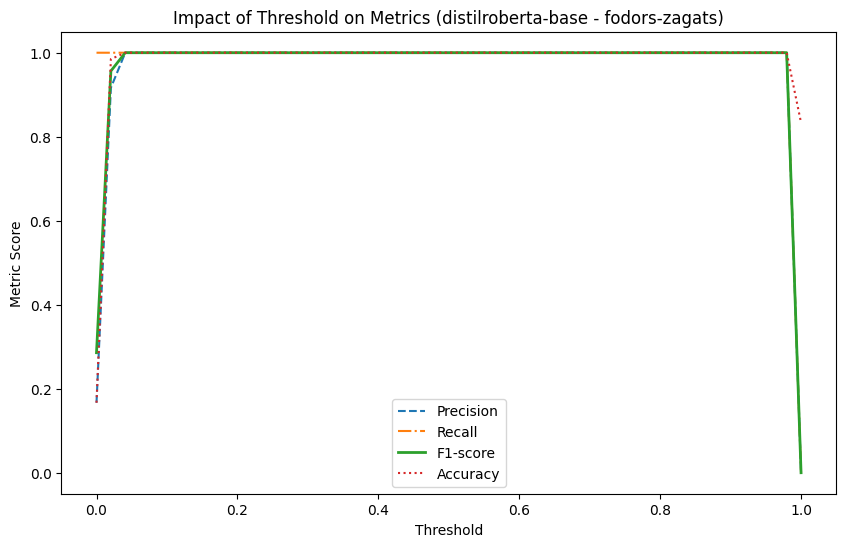

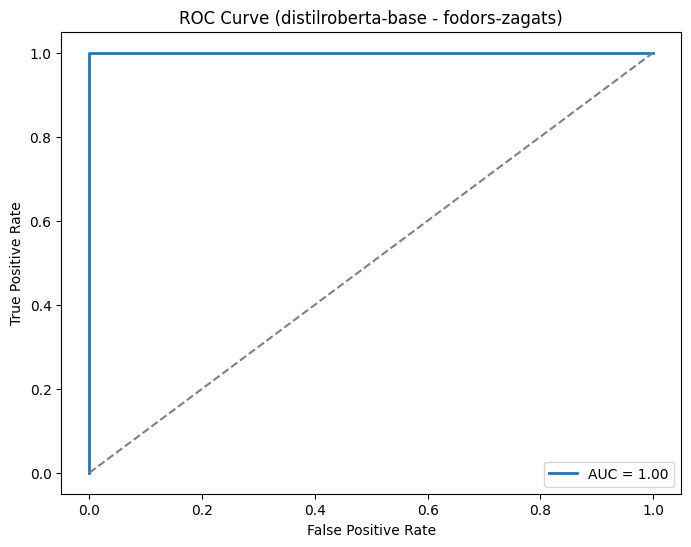

/Users/ttperr/Documents/Code/Pro/Work/WavER/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ttperr/Documents/Code/Pro/Work/WavER/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ttperr/Documents/Code/Pro/Work/WavER/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

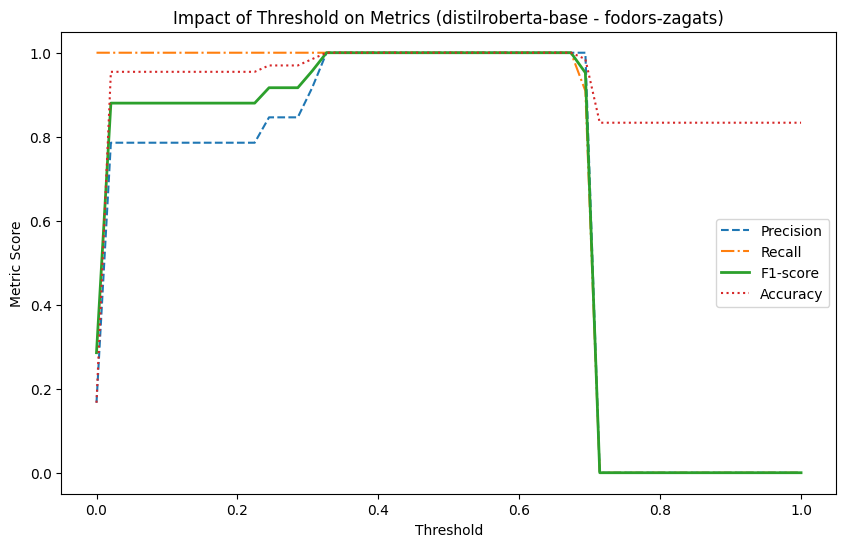

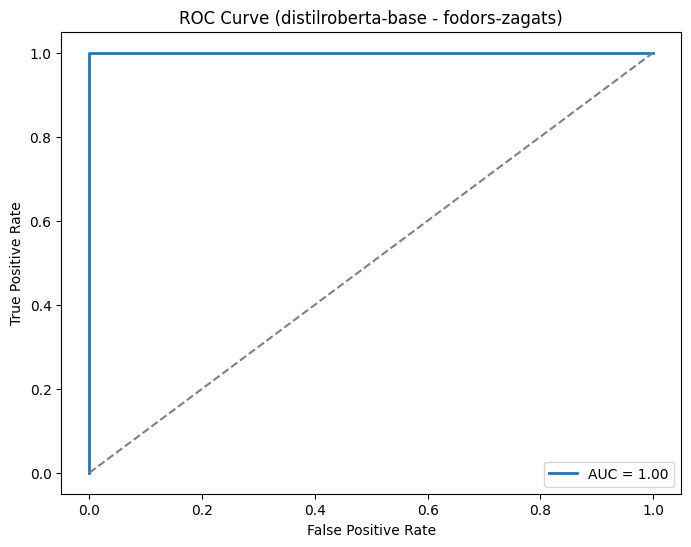

/Users/ttperr/Documents/Code/Pro/Work/WavER/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ttperr/Documents/Code/Pro/Work/WavER/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ttperr/Documents/Code/Pro/Work/WavER/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

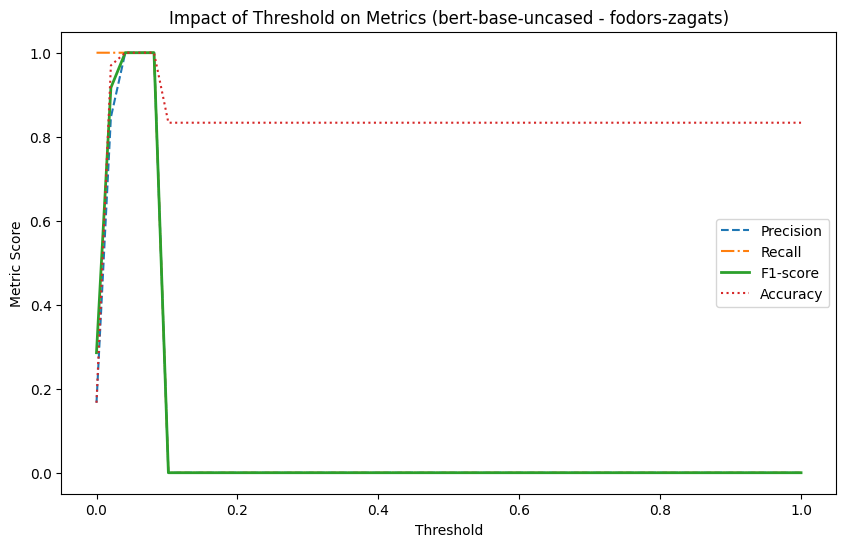

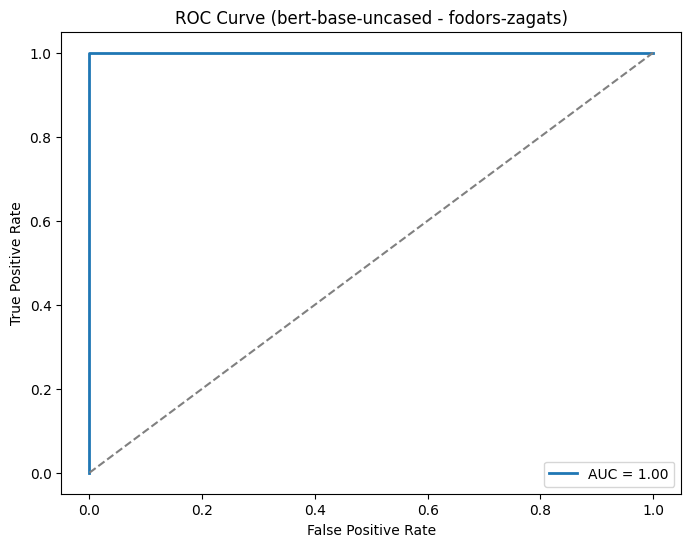

/Users/ttperr/Documents/Code/Pro/Work/WavER/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ttperr/Documents/Code/Pro/Work/WavER/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ttperr/Documents/Code/Pro/Work/WavER/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

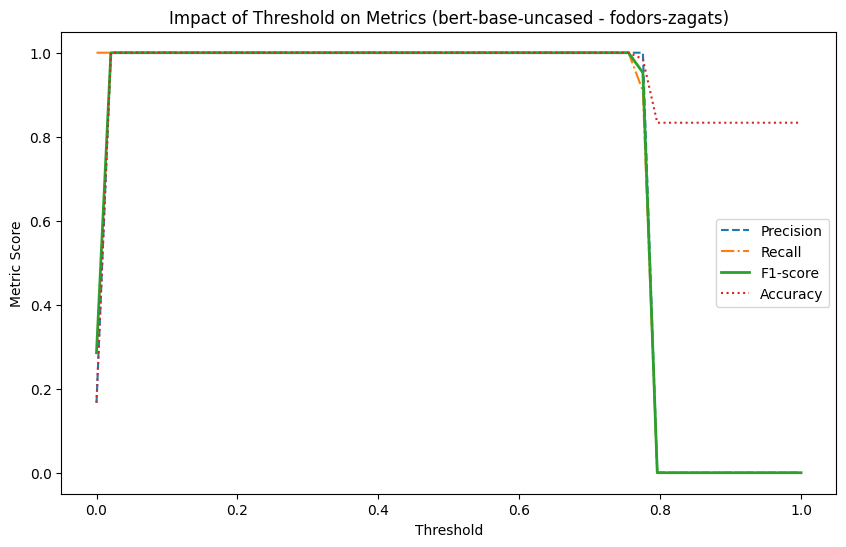

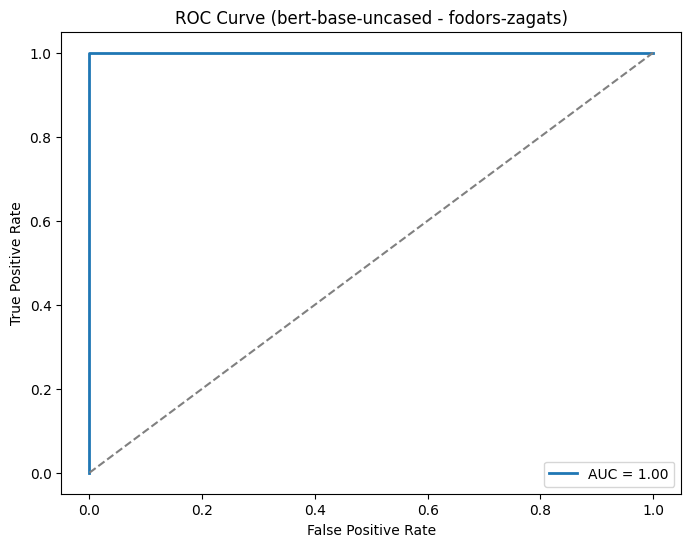

/Users/ttperr/Documents/Code/Pro/Work/WavER/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ttperr/Documents/Code/Pro/Work/WavER/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ttperr/Documents/Code/Pro/Work/WavER/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

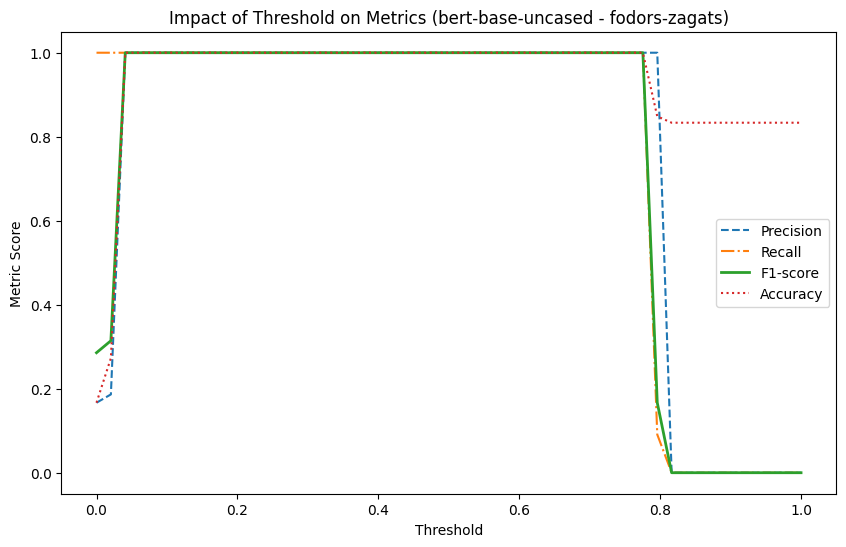

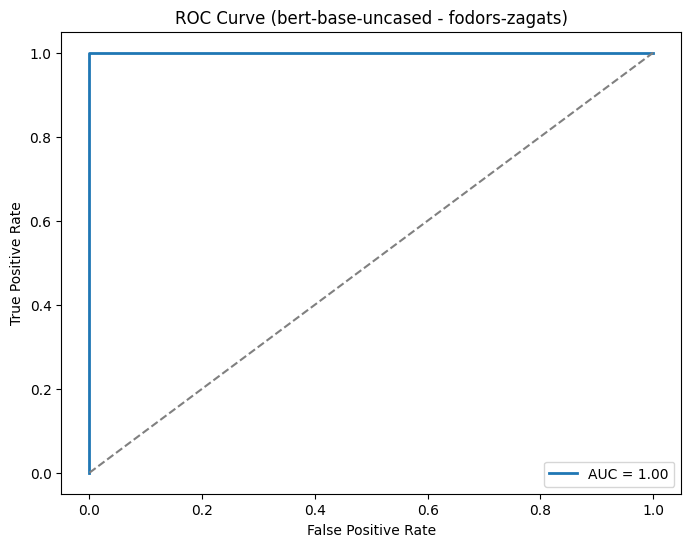

/Users/ttperr/Documents/Code/Pro/Work/WavER/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ttperr/Documents/Code/Pro/Work/WavER/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ttperr/Documents/Code/Pro/Work/WavER/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

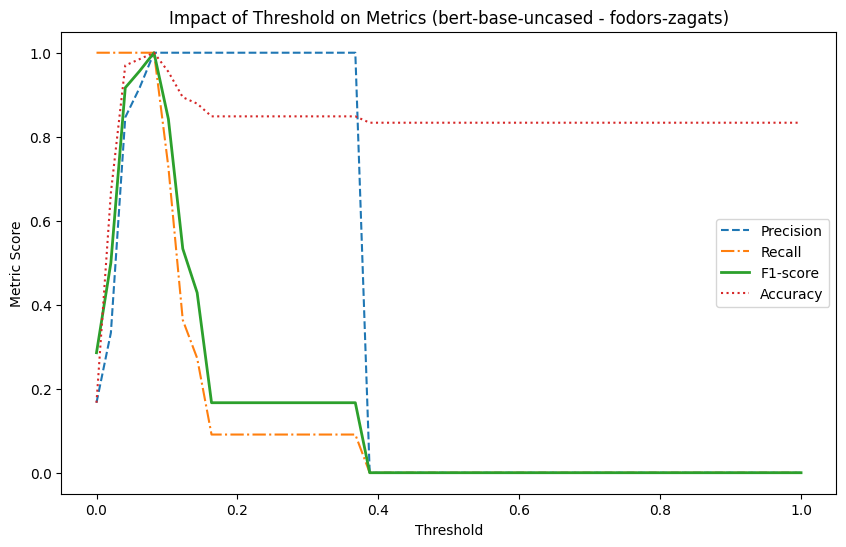

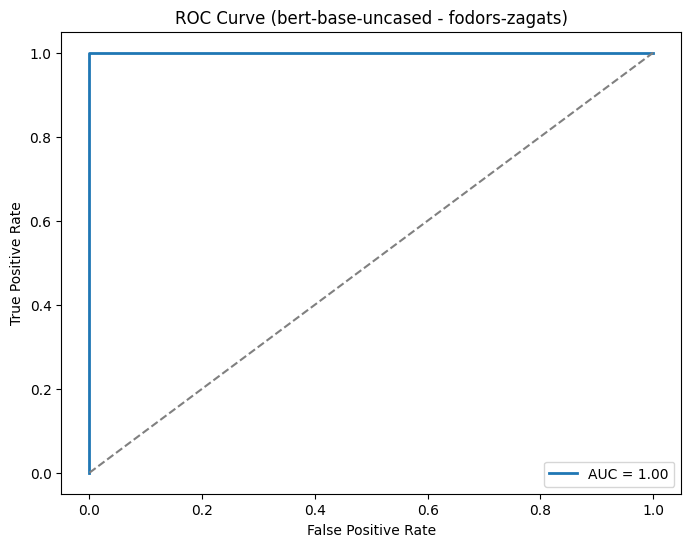

Table A columns:
    column_name data_example
1   description          NaN
2  manufacturer   broderbund
3         price          0.0 

Table B columns:
    column_name              data_example
1   description  learning quickbooks 2007
2  manufacturer                    intuit
3         price                     38.99 

Serialized entities 



/Users/ttperr/Documents/Code/Pro/Work/WavER/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


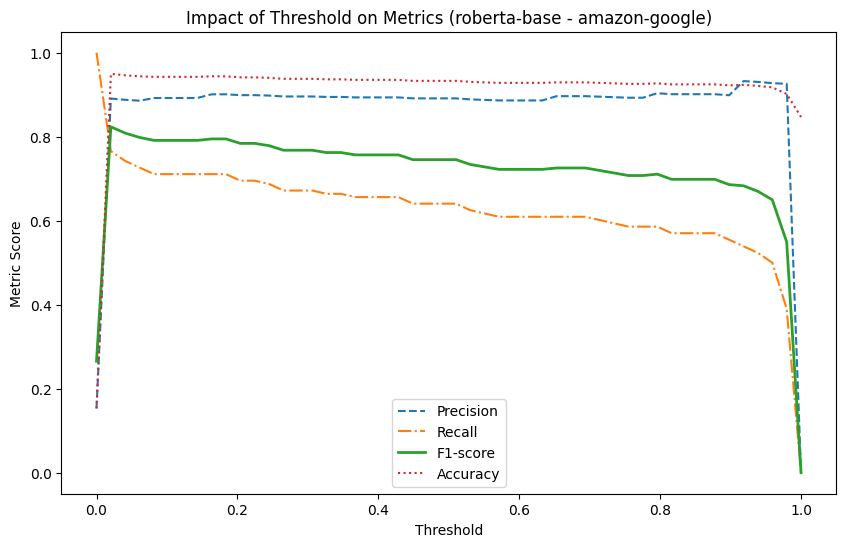

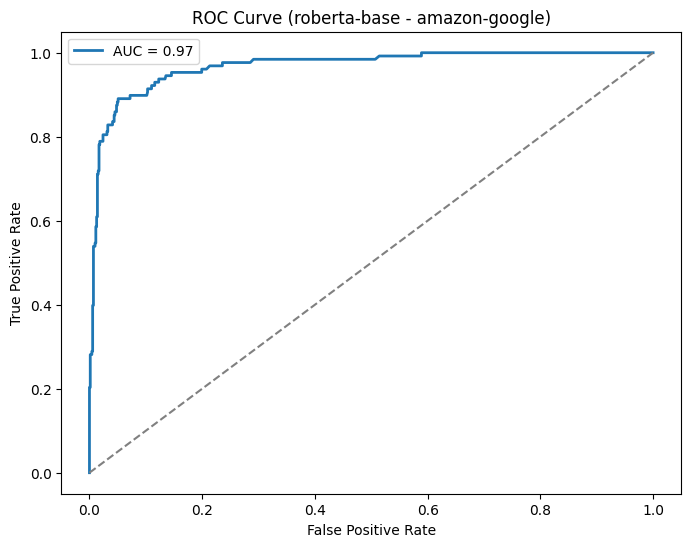

/Users/ttperr/Documents/Code/Pro/Work/WavER/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


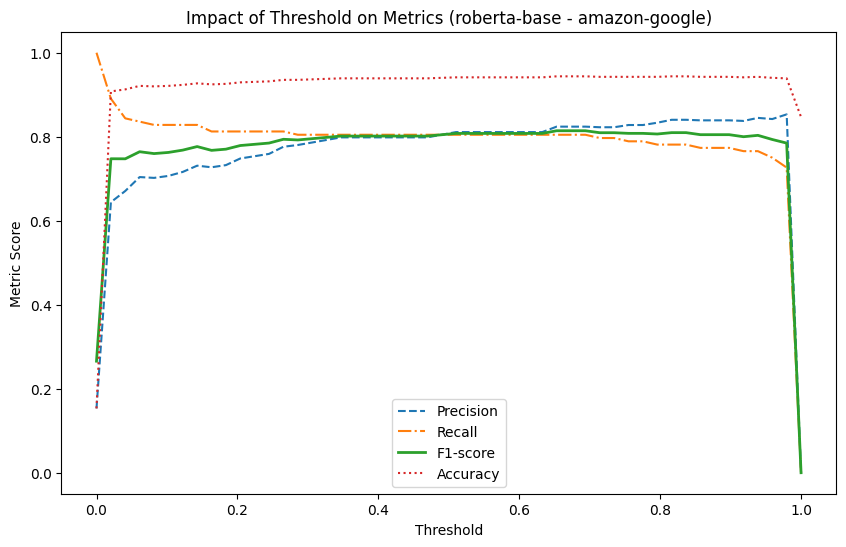

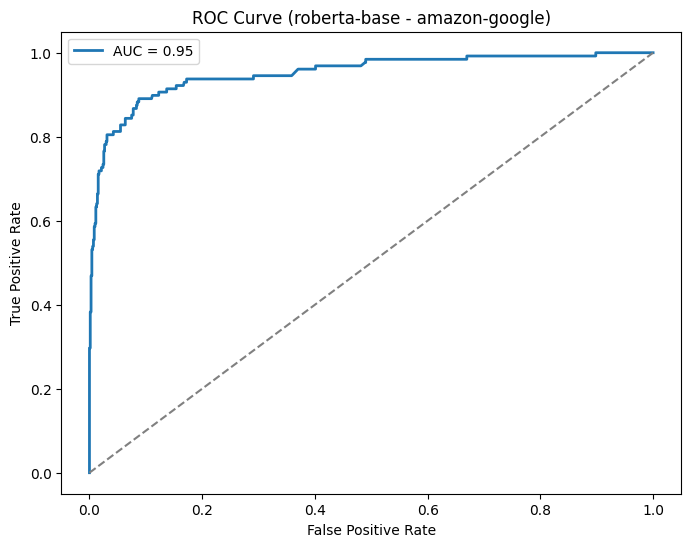

/Users/ttperr/Documents/Code/Pro/Work/WavER/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


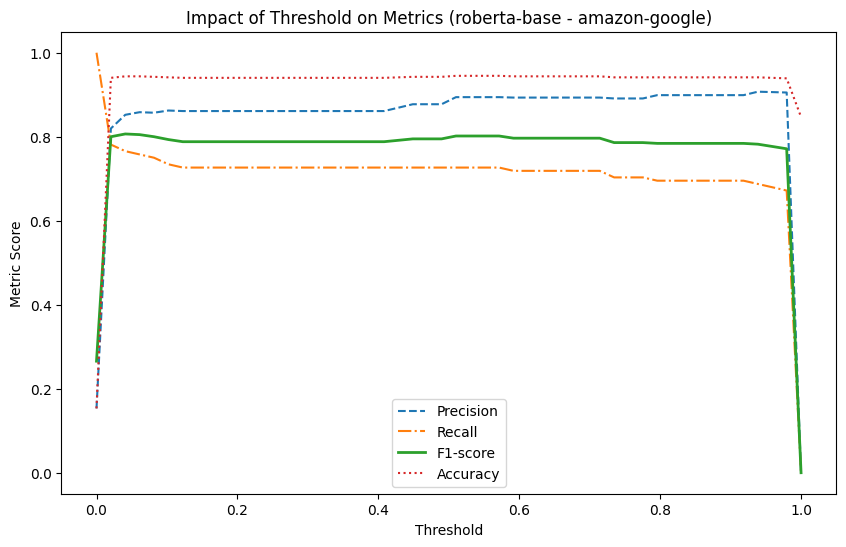

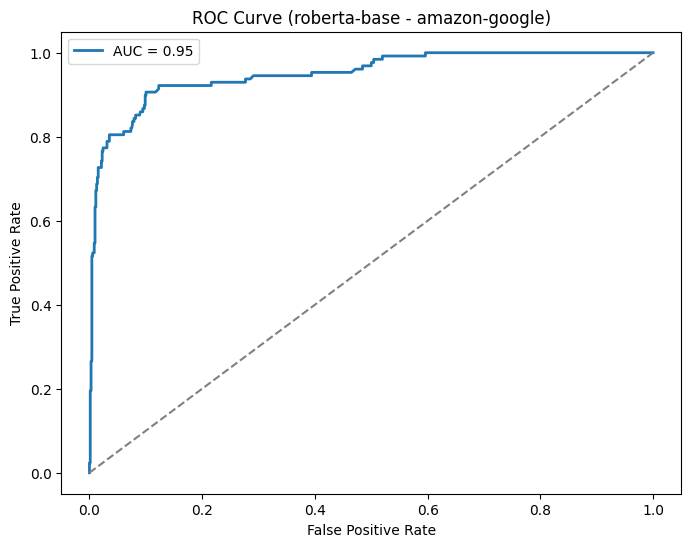

/Users/ttperr/Documents/Code/Pro/Work/WavER/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


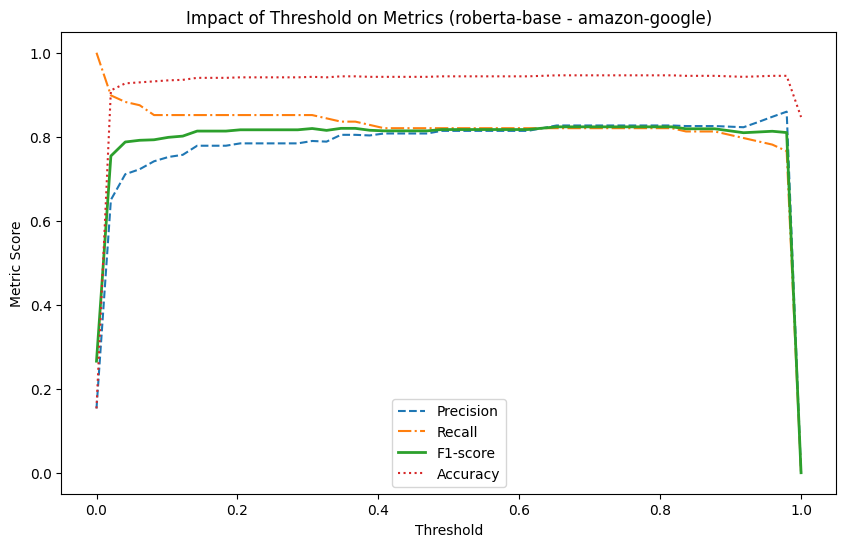

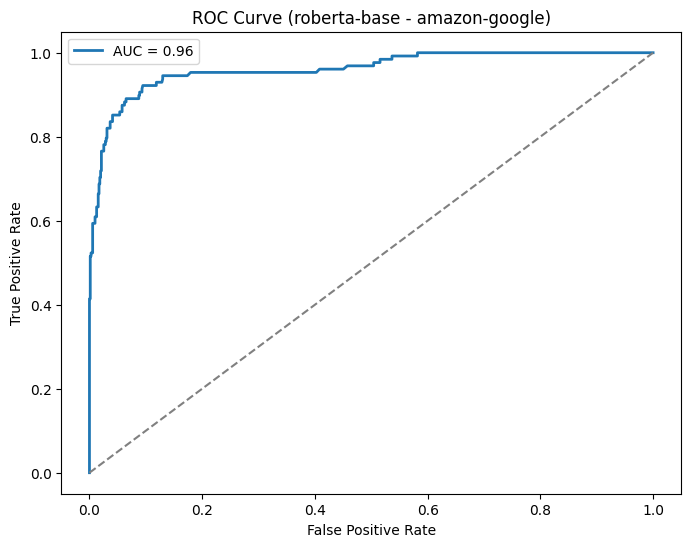

/Users/ttperr/Documents/Code/Pro/Work/WavER/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


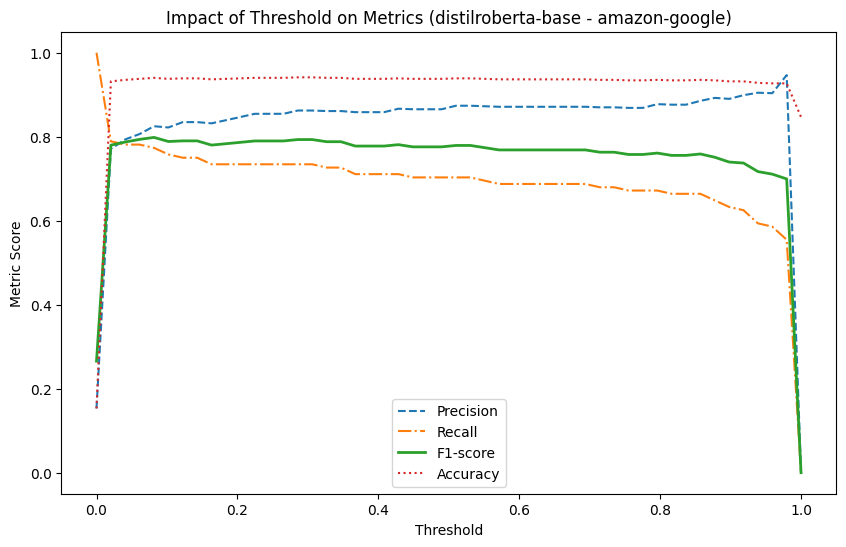

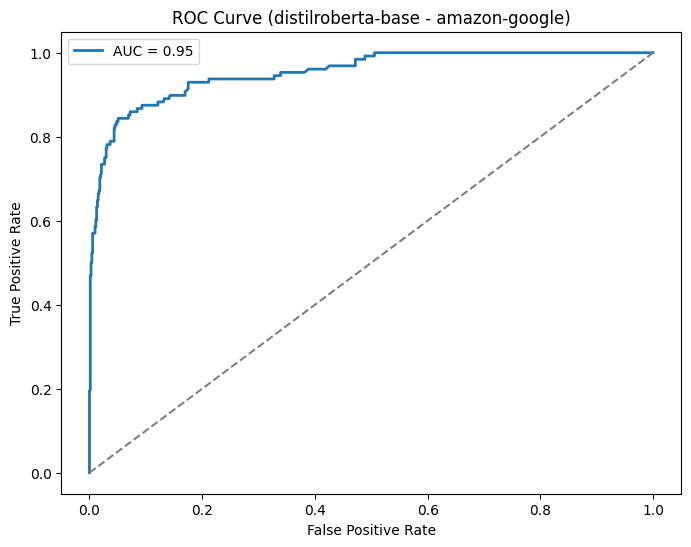

/Users/ttperr/Documents/Code/Pro/Work/WavER/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


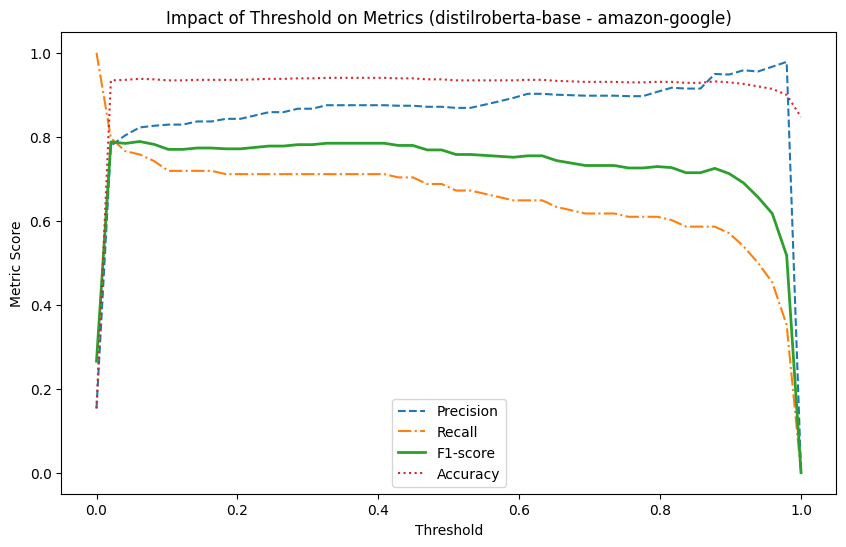

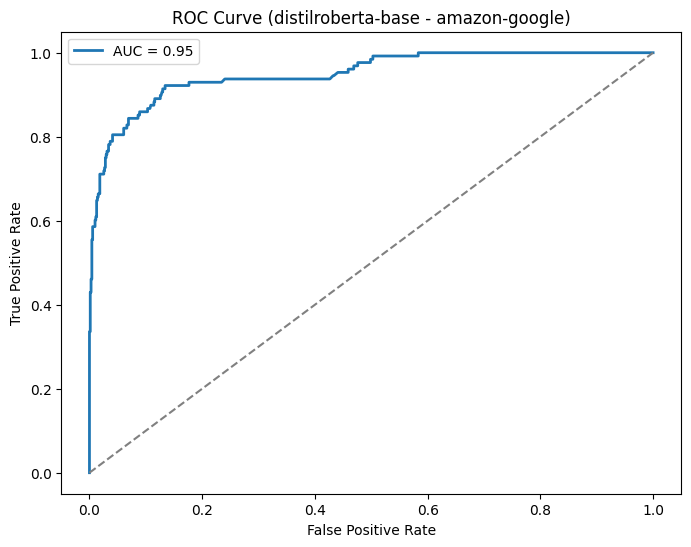

/Users/ttperr/Documents/Code/Pro/Work/WavER/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


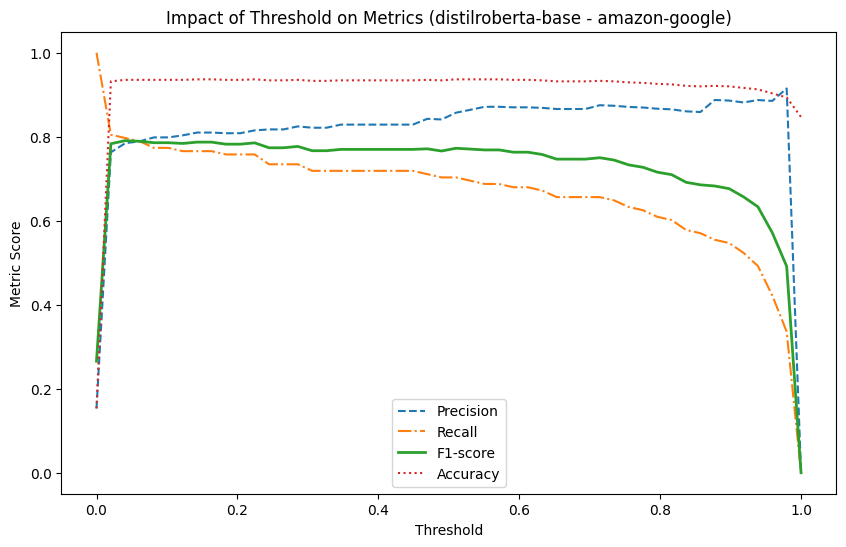

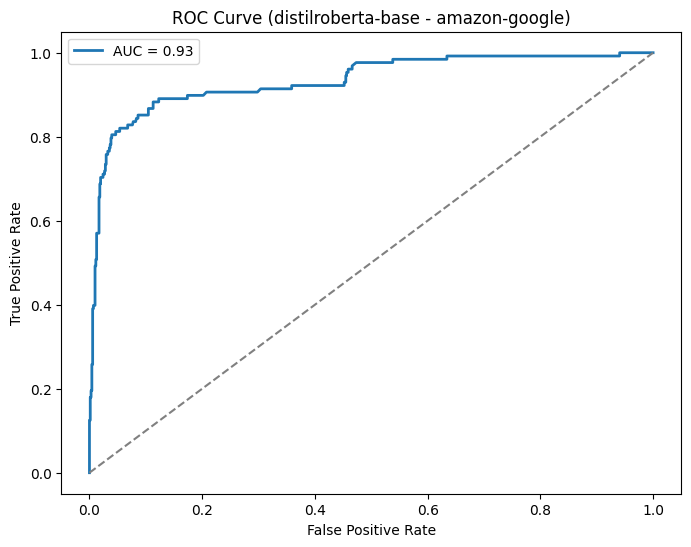

/Users/ttperr/Documents/Code/Pro/Work/WavER/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


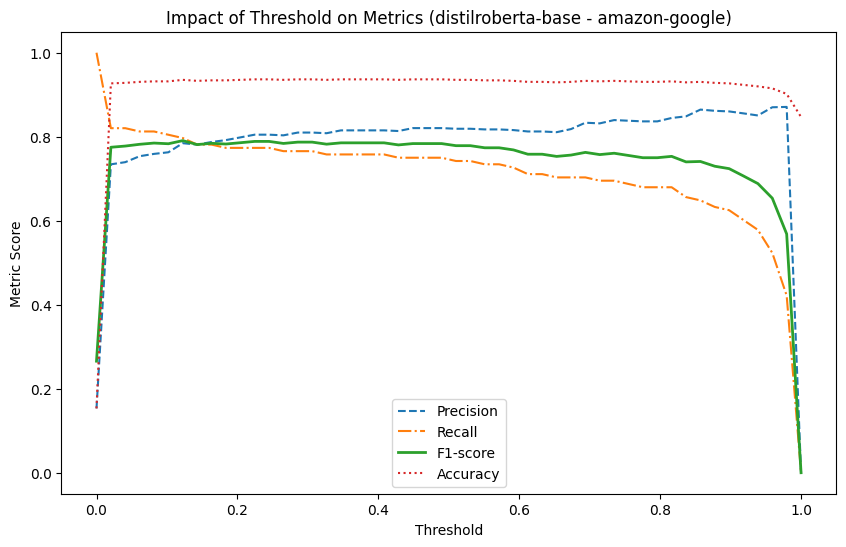

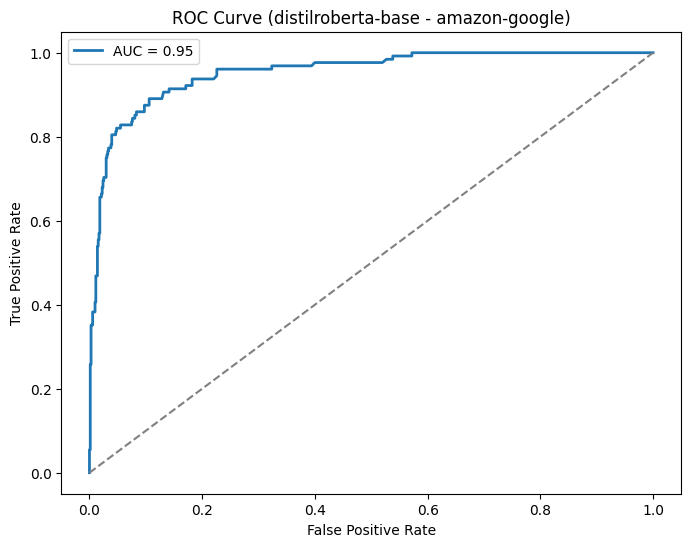

/Users/ttperr/Documents/Code/Pro/Work/WavER/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


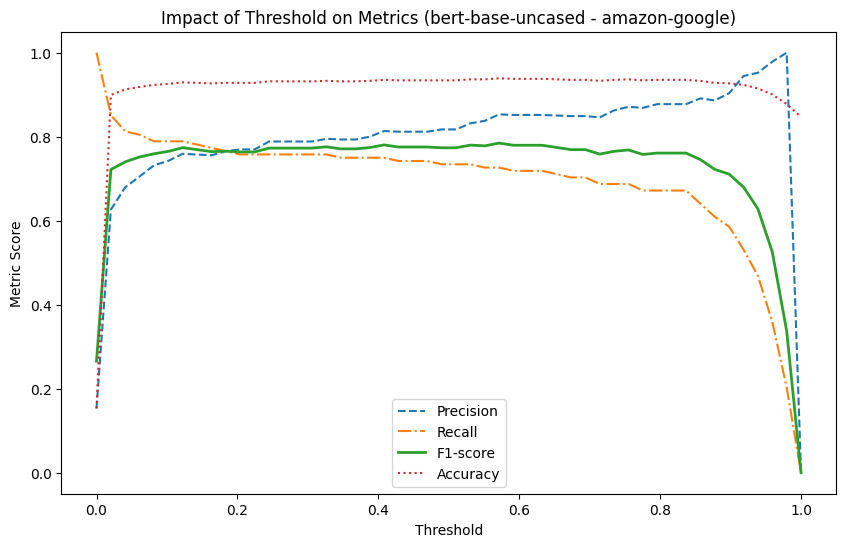

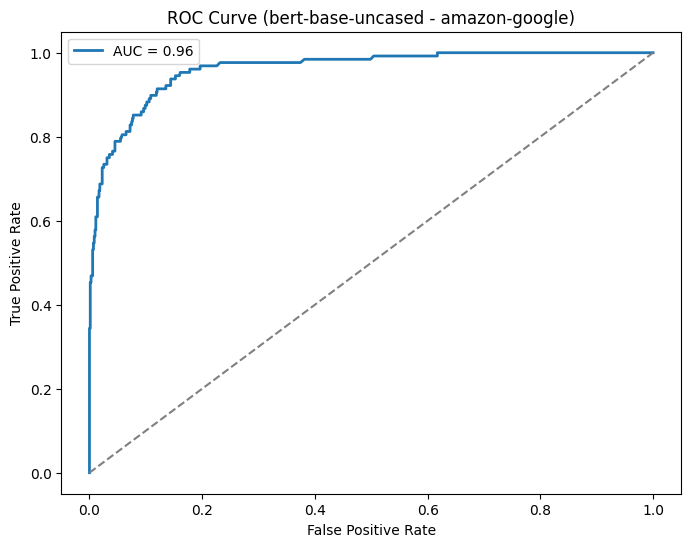

/Users/ttperr/Documents/Code/Pro/Work/WavER/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


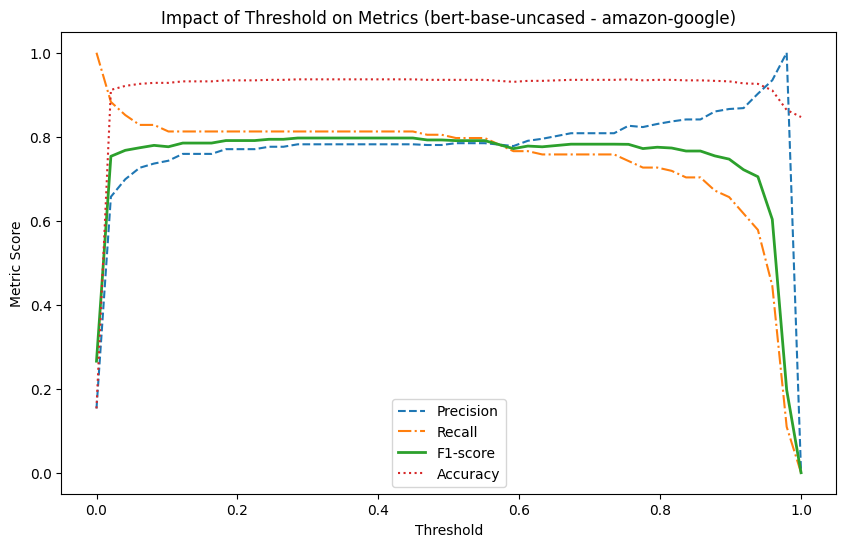

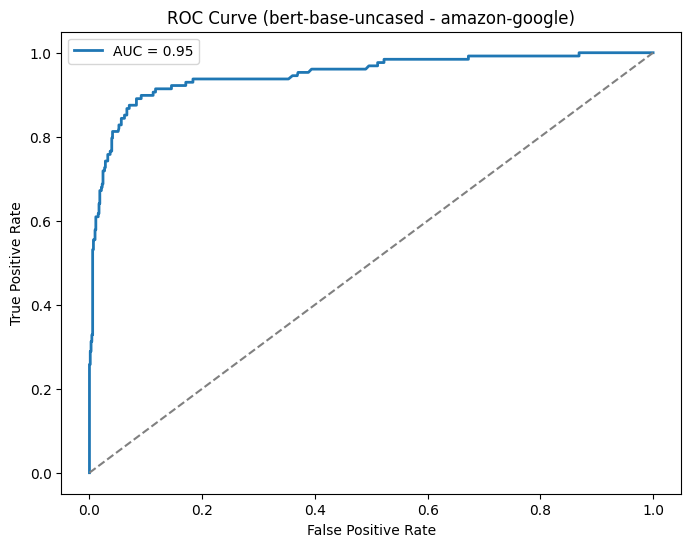

/Users/ttperr/Documents/Code/Pro/Work/WavER/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


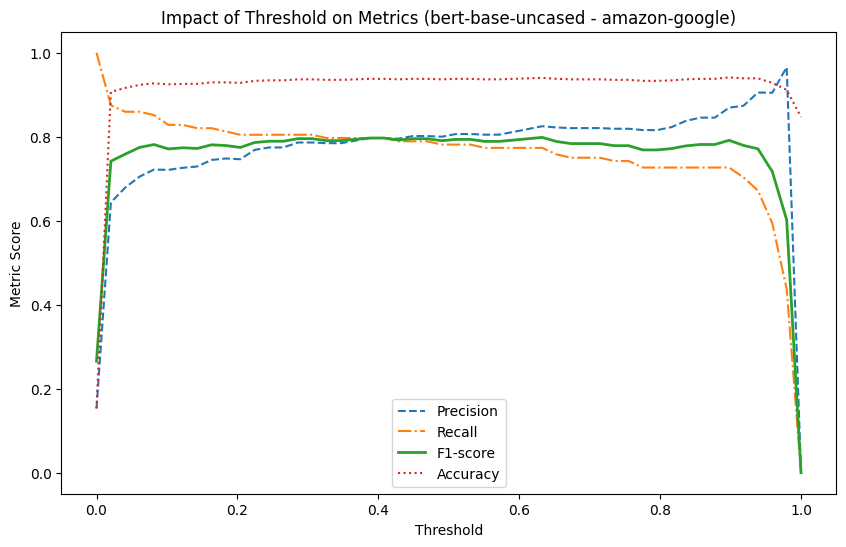

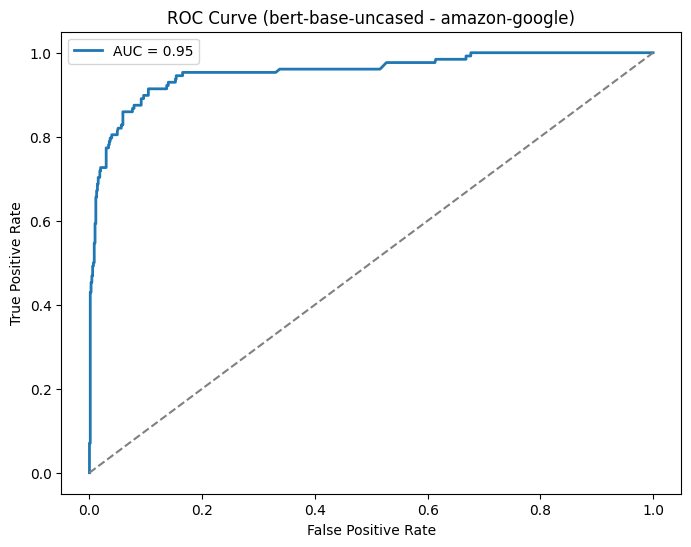

/Users/ttperr/Documents/Code/Pro/Work/WavER/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


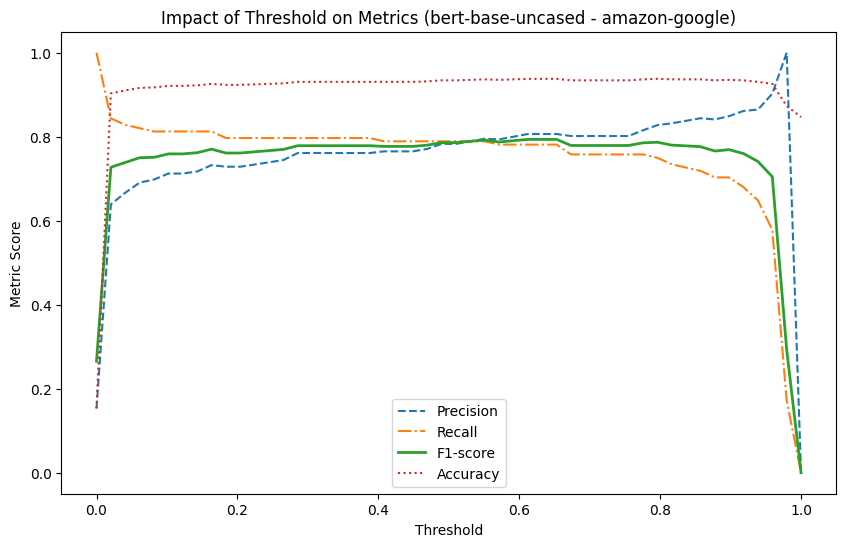

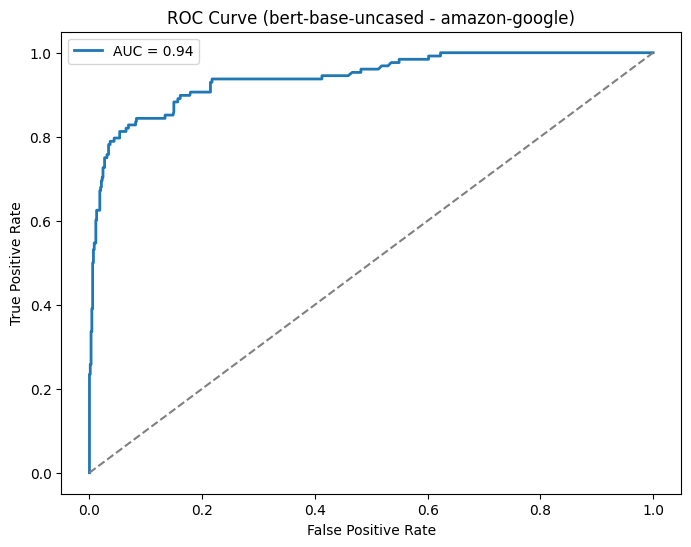

Table A columns:
   column_name                                       data_example
1  description  Sony Turntable - PSLX350H/ Belt Drive System/ ...
2        price                                                NaN 

Table B columns:
    column_name                                       data_example
1   description  Linksys EtherFast 8-Port 10/100 Switch (New/Wo...
2  manufacturer                                            LINKSYS
3         price                                                NaN 

Columns are not the same in both tables
Table A columns: ['name' 'description' 'price']
Table B columns: ['name' 'description' 'manufacturer' 'price']
Serialized entities 



/Users/ttperr/Documents/Code/Pro/Work/WavER/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


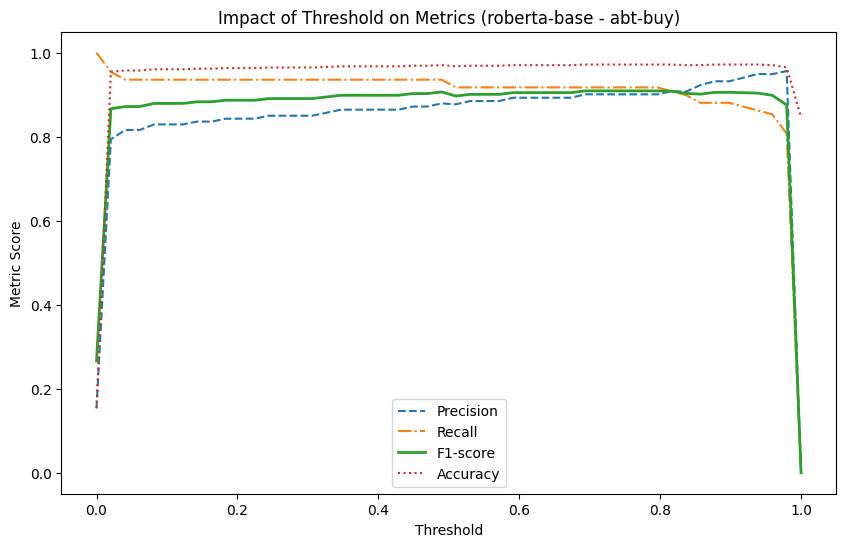

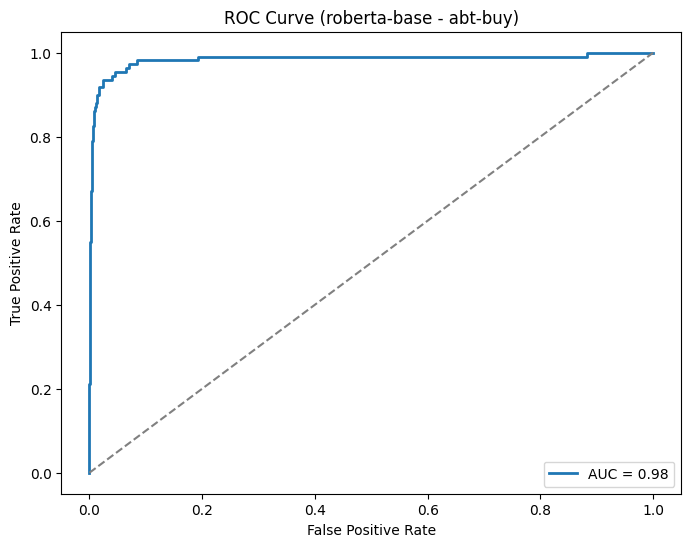

/Users/ttperr/Documents/Code/Pro/Work/WavER/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


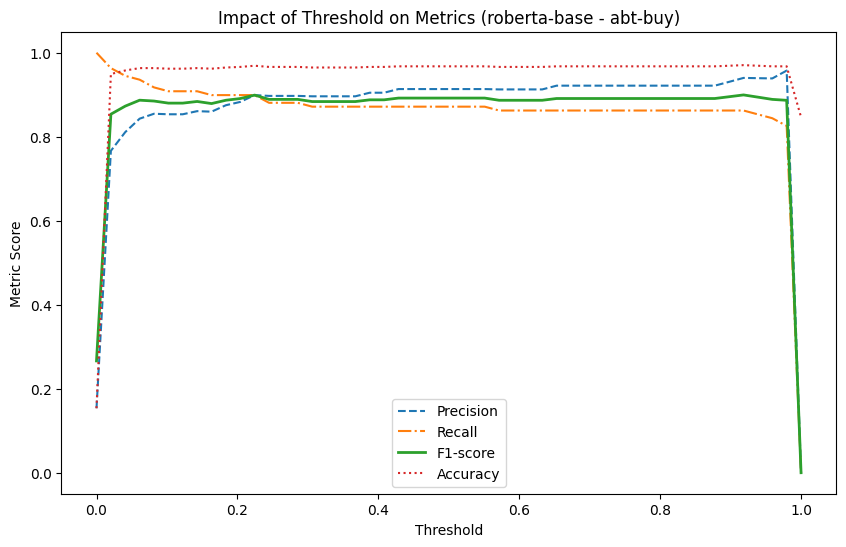

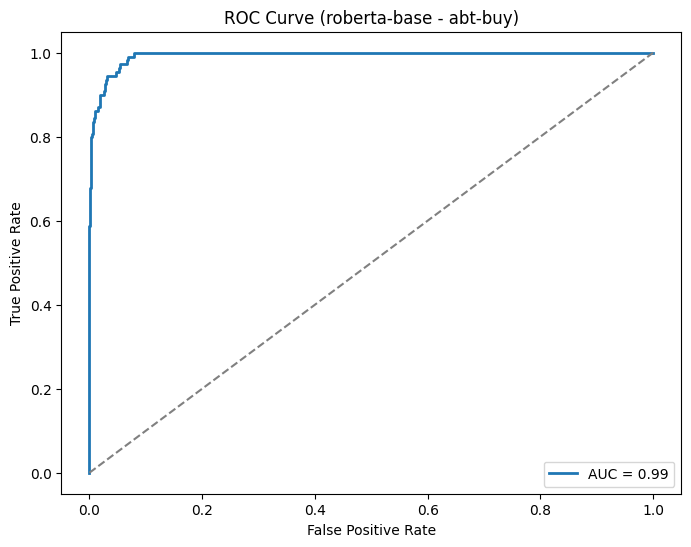

/Users/ttperr/Documents/Code/Pro/Work/WavER/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


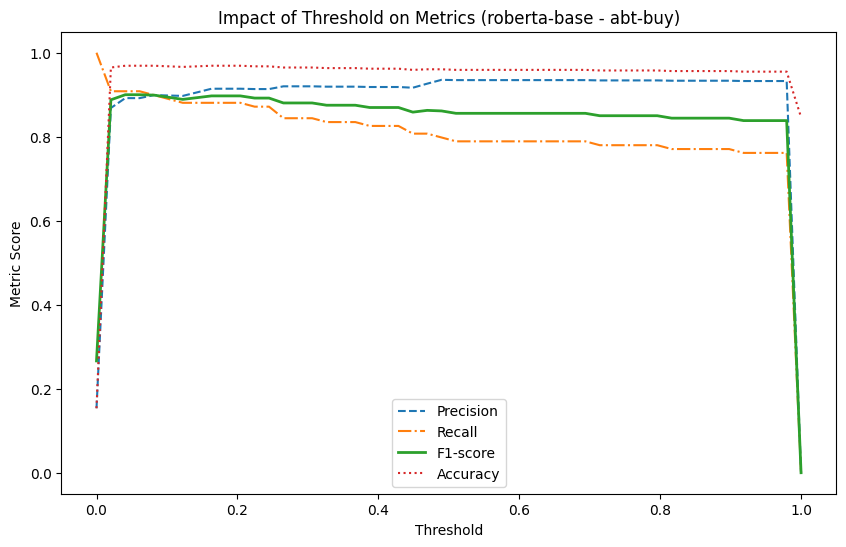

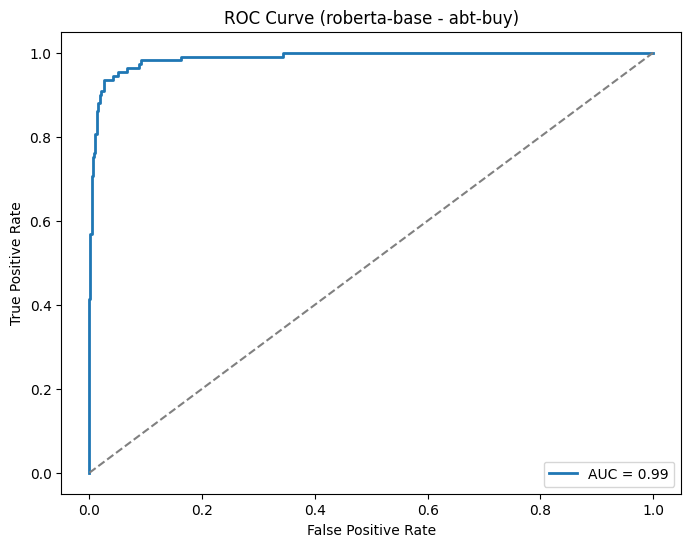

/Users/ttperr/Documents/Code/Pro/Work/WavER/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


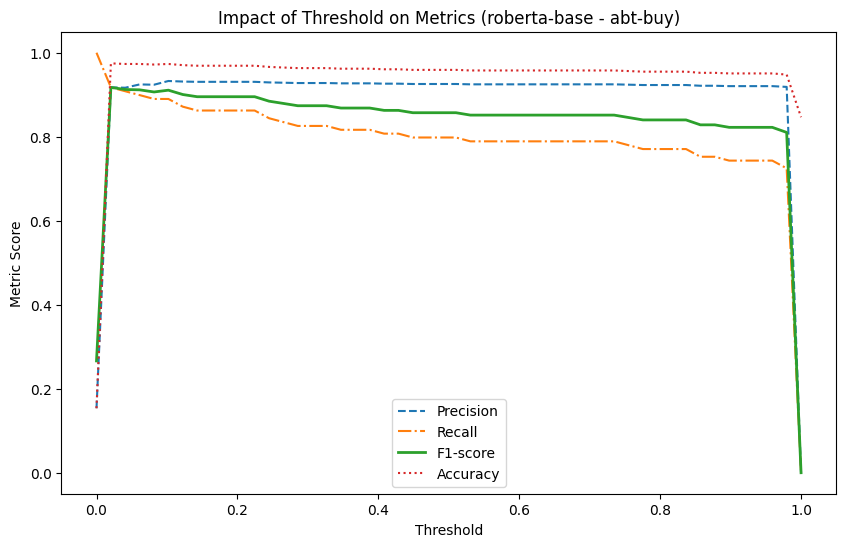

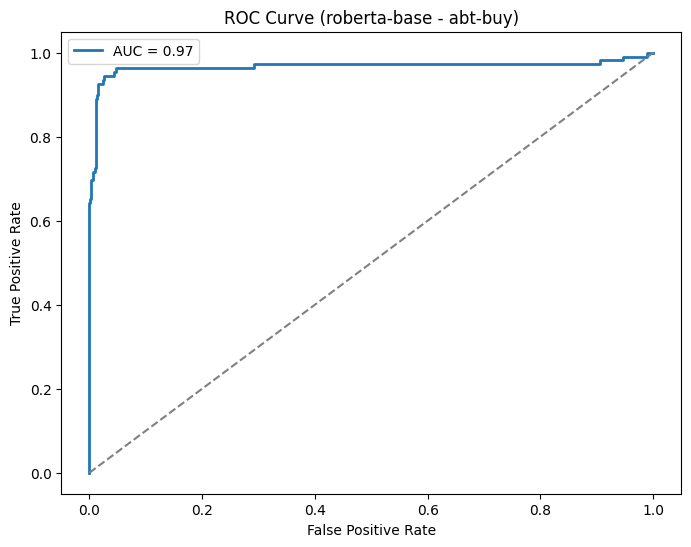

/Users/ttperr/Documents/Code/Pro/Work/WavER/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


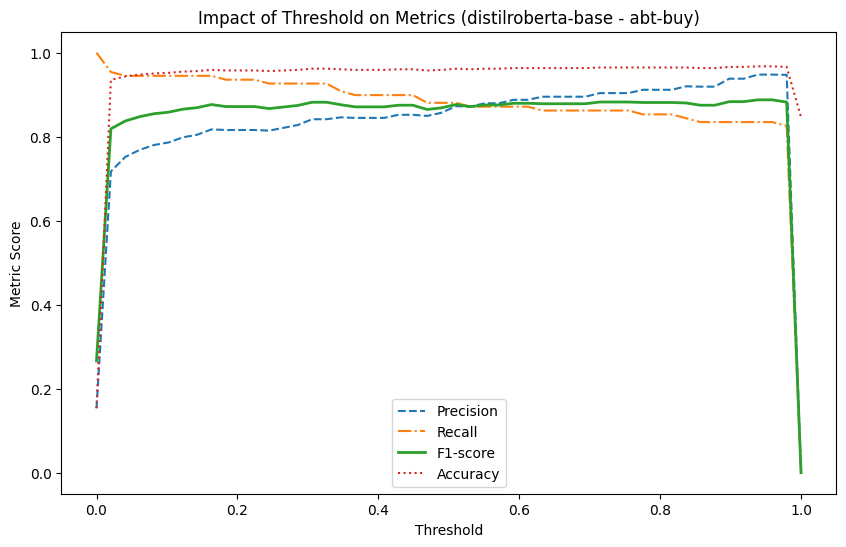

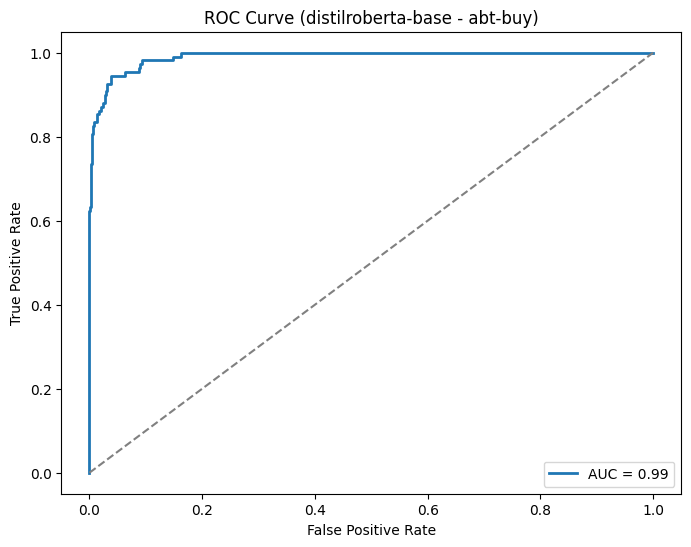

/Users/ttperr/Documents/Code/Pro/Work/WavER/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


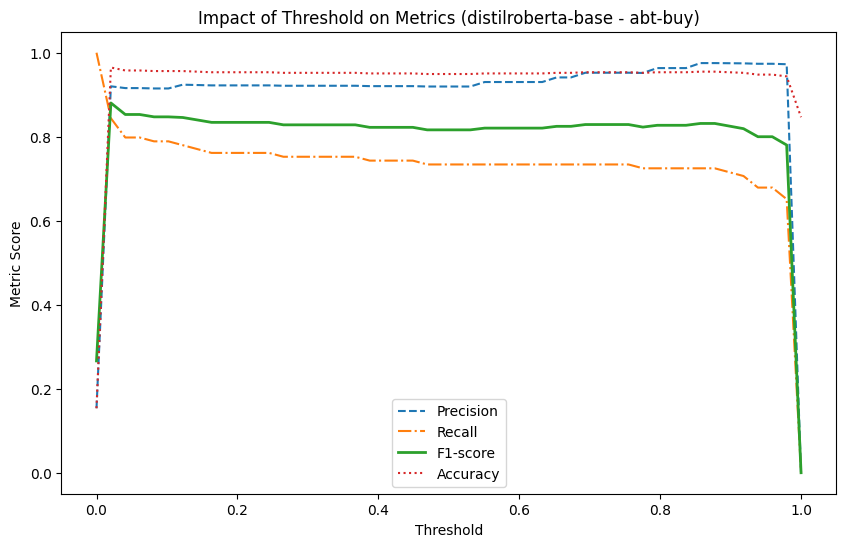

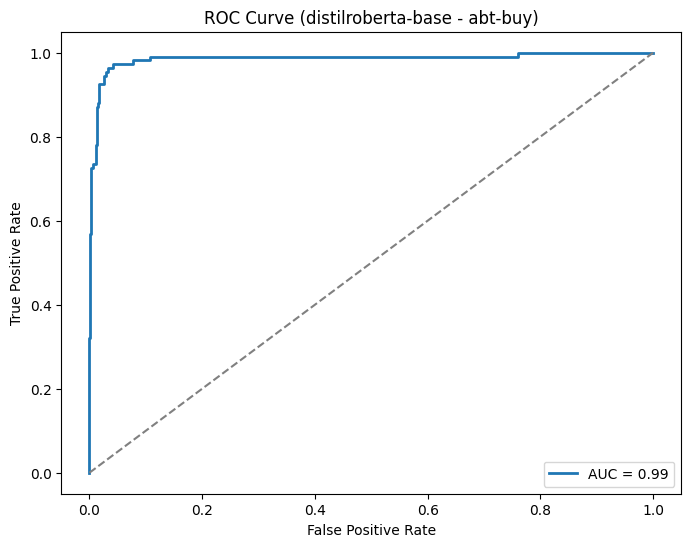

/Users/ttperr/Documents/Code/Pro/Work/WavER/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


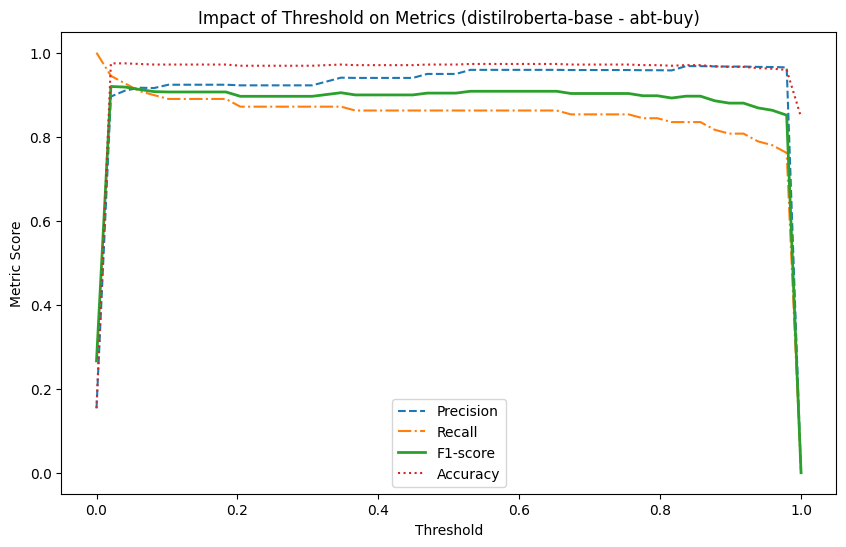

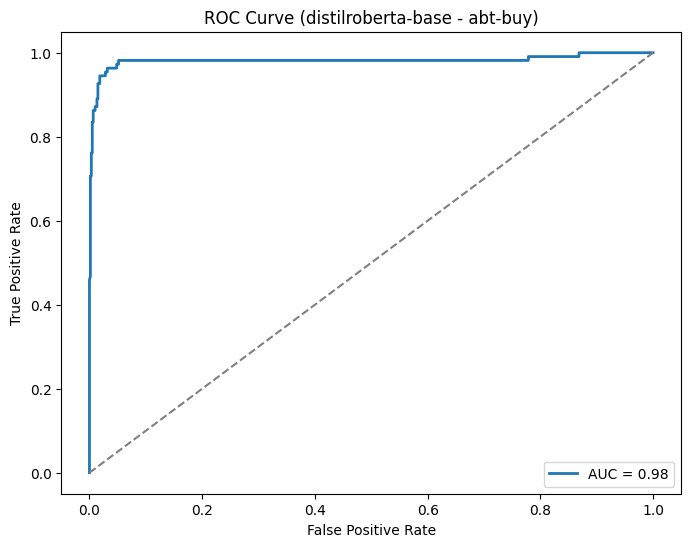

/Users/ttperr/Documents/Code/Pro/Work/WavER/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


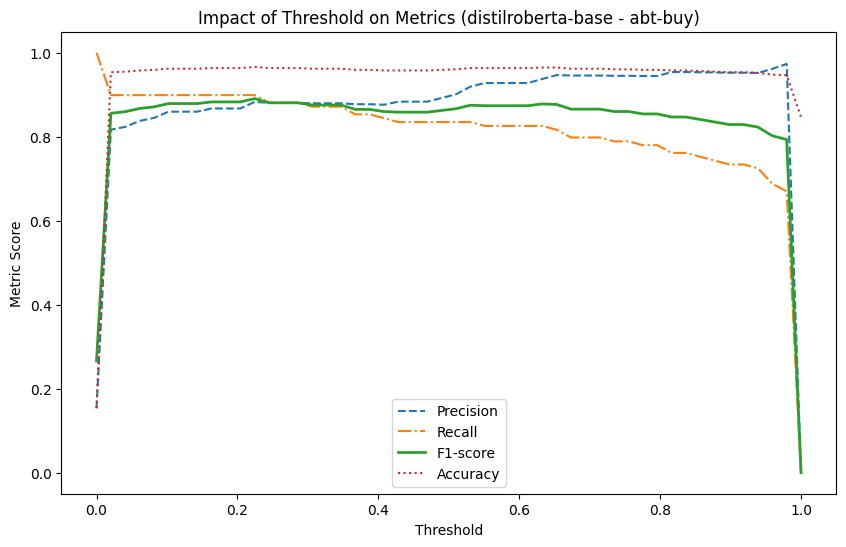

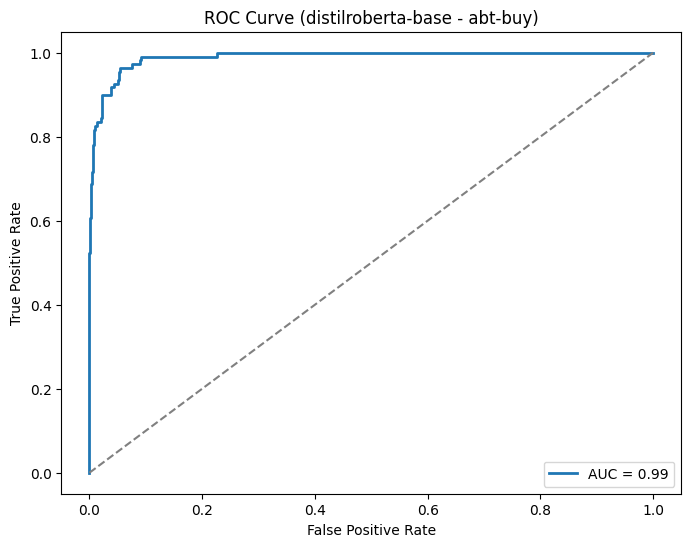

/Users/ttperr/Documents/Code/Pro/Work/WavER/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


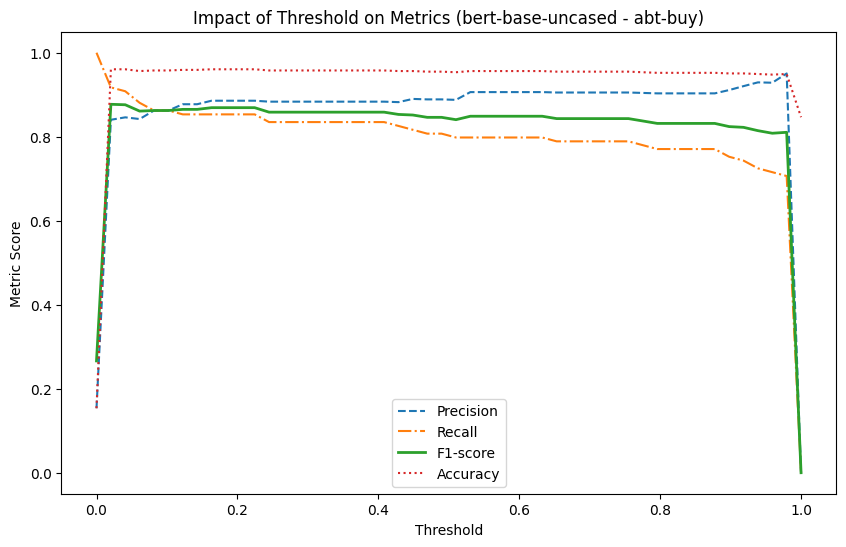

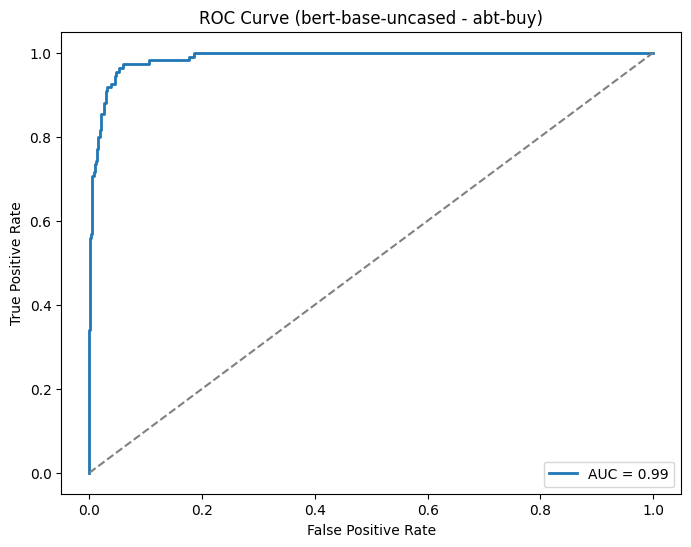

/Users/ttperr/Documents/Code/Pro/Work/WavER/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


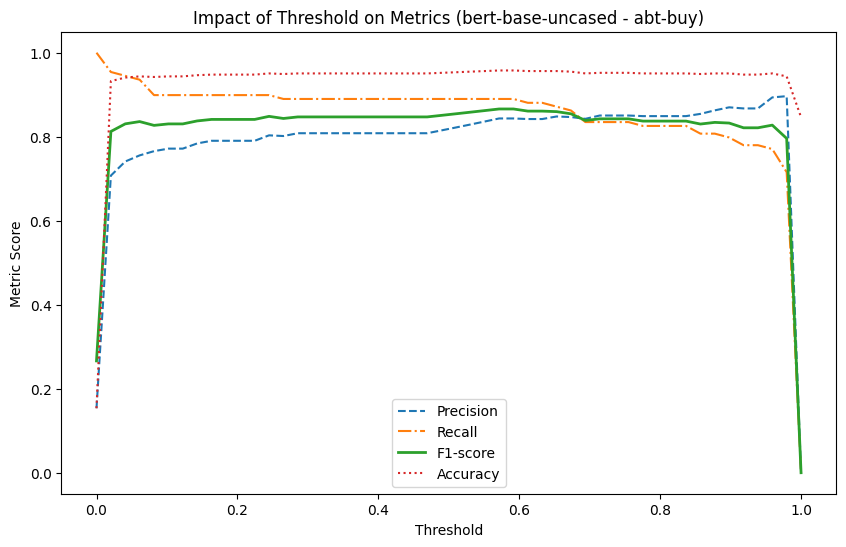

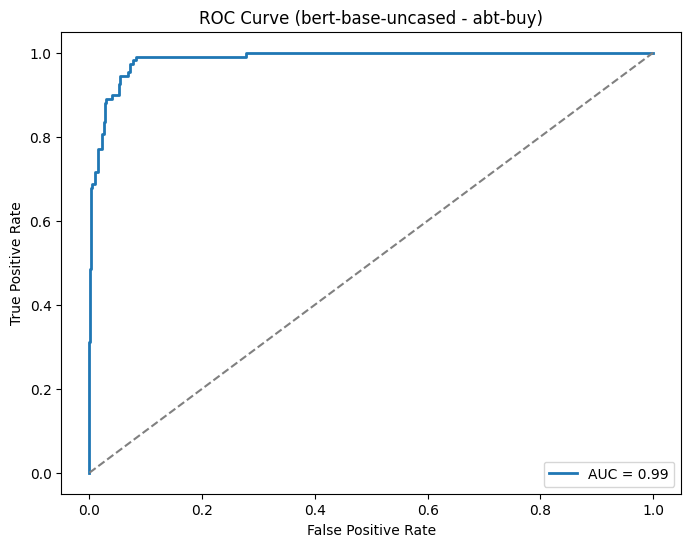

/Users/ttperr/Documents/Code/Pro/Work/WavER/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


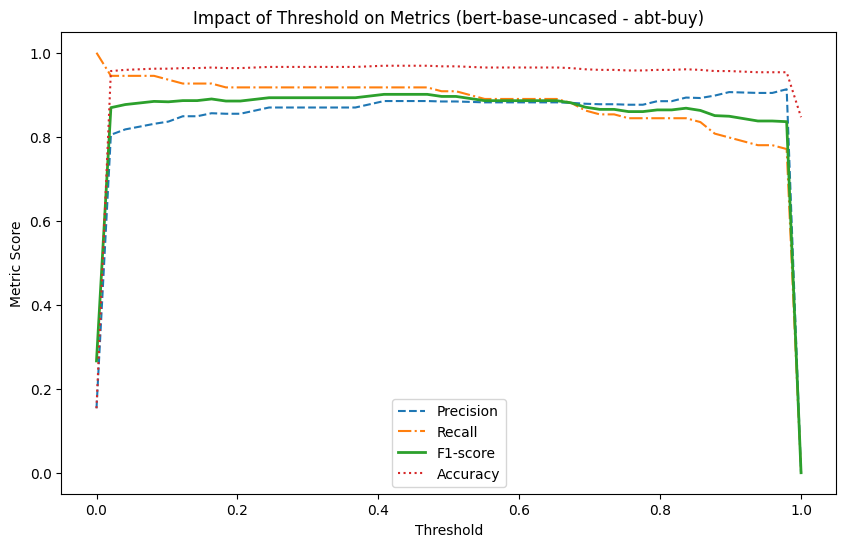

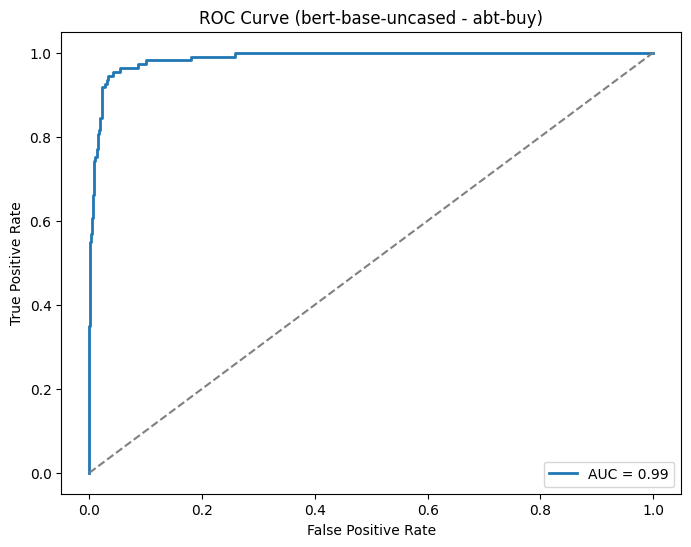

/Users/ttperr/Documents/Code/Pro/Work/WavER/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


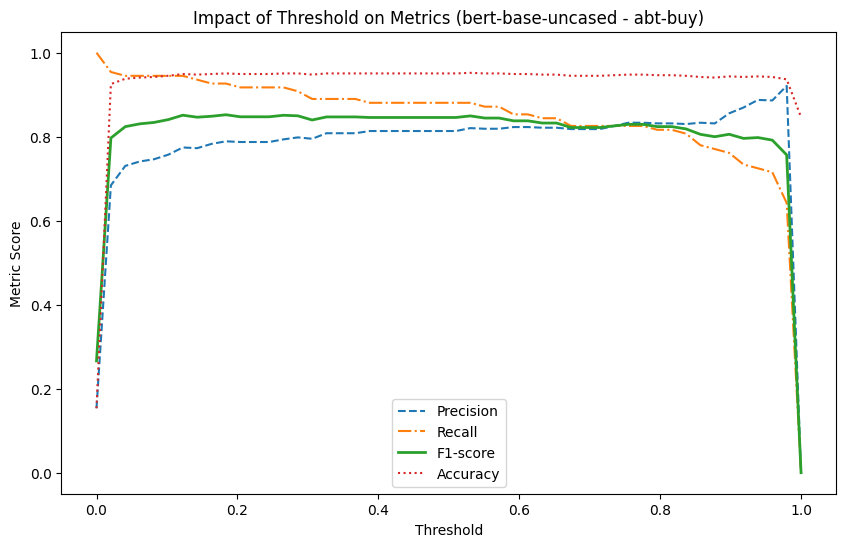

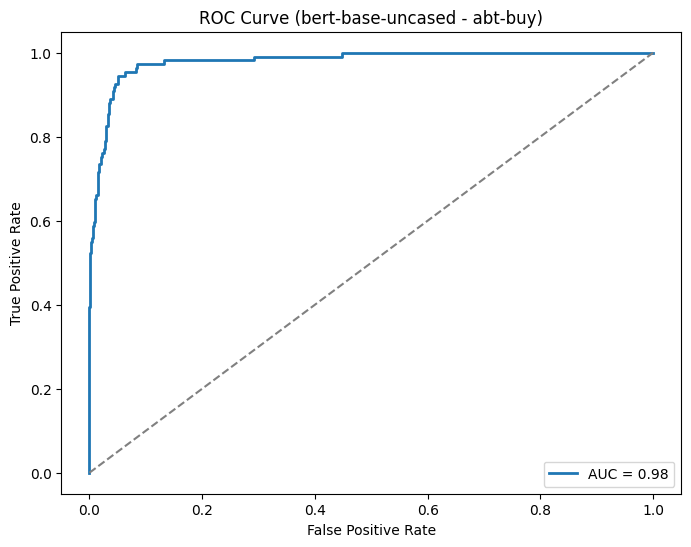

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve, auc

# Store results for plotting
thresholds = np.linspace(0, 1, 50)  # 50 different thresholds from 0 to 1

metrics_results = {}

# Loop through models and datasets
for data_name, models in results_dict.items():
    table_a_serialized, table_b_serialized, X_train_ids, y_train, X_valid_ids, y_valid, X_test_ids, y_test = load_data(os.path.join(import_data.DATA_FOLDER, data_name))
    for model_name, orders in models.items():
        for order_cols, removes in orders.items():
            for remove_col_names, metrics in removes.items():
                y_probs = np.array(metrics["logits"]["pred"])

                precisions, recalls, f1s, accuracies = [], [], [], []

                for thresh in thresholds:
                    y_pred = (y_probs >= thresh).astype(int)

                    precisions.append(precision_score(y_test, y_pred))
                    recalls.append(recall_score(y_test, y_pred))
                    f1s.append(f1_score(y_test, y_pred))
                    accuracies.append(accuracy_score(y_test, y_pred))

                # Plot results
                fig, ax = plt.subplots(figsize=(10, 6))
                ax.plot(thresholds, precisions, label="Precision", linestyle="--")
                ax.plot(thresholds, recalls, label="Recall", linestyle="-.")
                ax.plot(thresholds, f1s, label="F1-score", linewidth=2)
                ax.plot(thresholds, accuracies, label="Accuracy", linestyle="dotted")

                ax.set_xlabel("Threshold")
                ax.set_ylabel("Metric Score")
                ax.set_title(f"Impact of Threshold on Metrics ({model_name} - {data_name})")
                ax.legend()
                plt.show()

                # ROC Curve
                fpr, tpr, _ = roc_curve(y_test, y_probs)
                auc_score = auc(fpr, tpr)

                plt.figure(figsize=(8, 6))
                plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}", linewidth=2)
                plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal line
                plt.xlabel("False Positive Rate")
                plt.ylabel("True Positive Rate")
                plt.title(f"ROC Curve ({model_name} - {data_name})")
                plt.legend()
                plt.show()

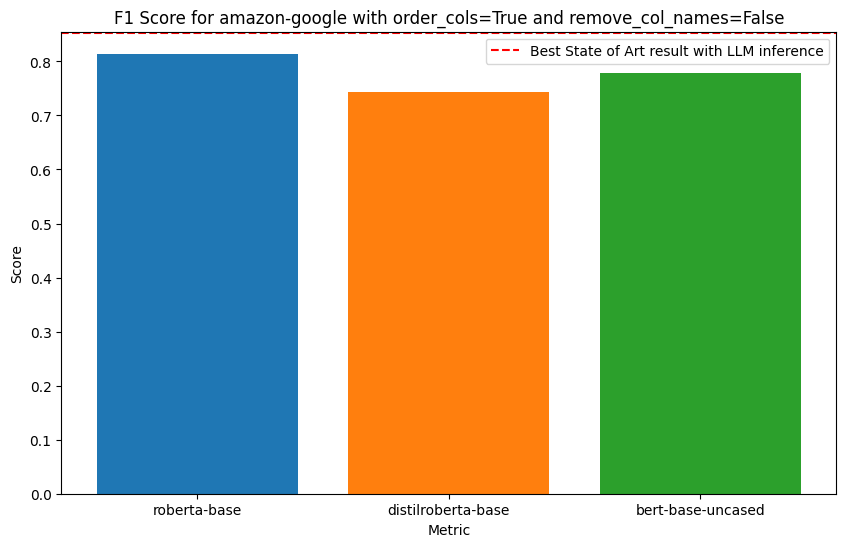

In [12]:
data_name = 'amazon-google'
order_cols = True
remove_col_names = False

f1_score_roberta_base = results_dict[data_name]['roberta-base'][order_cols][remove_col_names]['f1']
f1_score_distilbert = results_dict[data_name]['distilroberta-base'][order_cols][remove_col_names]['f1']
f1_score_bert_uncased = results_dict[data_name]['bert-base-uncased'][order_cols][remove_col_names]['f1']

plt.figure(figsize=(10, 6))
plt.bar(['roberta-base', 'distilroberta-base', 'bert-base-uncased'], [f1_score_roberta_base, f1_score_distilbert, f1_score_bert_uncased], color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.axhline(y=0.8521, color='r', linestyle='--', label='Best State of Art result with LLM inference')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.title(f'F1 Score for {data_name} with order_cols={order_cols} and remove_col_names={remove_col_names}')
plt.legend()
plt.show()